In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from sklearn.utils import resample
import os
import subprocess

In [3]:
path = "/Users/grai/Data_log/"
df_original = pd.read_csv(path+'log1.csv.gz')

In [4]:
df=df_original.copy()

In [5]:
df.head()

timestamp  cp_code request_id  obj_size  bytes_served  \
0  1.626388e+09   310851     329520   2412416       2412432   
1  1.626388e+09   310851     32823e      5833           690   
2  1.626388e+09   310851     32825f   2412416       2412432   
3  1.626388e+09   310851     328272   2412416       2412432   
4  1.626388e+09   310851     328252   2412416       2412432   

   uncompressed_length  new_connection  system_buffer  hoc  gzip_zip  ...  \
0                    0               1              1    0         0  ...   
1                 5833               0              0    1         1  ...   
2                    0               0              1    0         0  ...   
3                    0               0              1    0         0  ...   
4                    0               0              1    0         0  ...   

    ocl  phtm_usecs  ssl_usecs  gzu_usecs  gzc_usecs  agg_flytes  cpu_flytes  \
0     0        6771         78          0          0       33151      451980   
1  5833        1909          0         12         96        4658      127493   
2     0        5351          0          0          0       29685      357129   
3     0        5579          0          0          0       30240      372340   
4     0        5104          0          0          0       24896      181943   

   disk_flytes  ssl_flytes  mdt_application_usecs  
0            0          73                   1071  
1            0        3703                   1258  
2            0        1773                    787  
3            0        2164                    924  
4            0        1047                    792  

[5 rows x 34 columns]

In [6]:
df.shape

(3375862, 34)

In [7]:
df.columns

Index(['timestamp', 'cp_code', 'request_id', 'obj_size', 'bytes_served',
       'uncompressed_length', 'new_connection', 'system_buffer', 'hoc',
       'gzip_zip', 'gzip_unzip', 'synchronous_refresh', 'parent_hit',
       'icp_peer_hit', 'prefetching_trigger', 'session_ticket',
       'cryptoserver_keysigning', 'sni', 'live_stream', 'ssl',
       'ssl_encryption_aes_256_gcm', 'ssl_keysigning_ecdsa',
       'ssl_encryption_aes_128_gcm', 'cca_bbr', 'ocl', 'phtm_usecs',
       'ssl_usecs', 'gzu_usecs', 'gzc_usecs', 'agg_flytes', 'cpu_flytes',
       'disk_flytes', 'ssl_flytes', 'mdt_application_usecs'],
      dtype='object')

In [8]:
path = "/Users/grai/Data_log/"
df_original2 = pd.read_csv(path+'log2.csv.gz')

In [9]:
df_original2.head()

timestamp  cp_code request_id  obj_size  bytes_served  \
0  1.626384e+09   173710     23d6e0      2185          2185   
1  1.626384e+09   173710     23d6ea      3924          3924   
2  1.626384e+09   173710     23d6eb      6088          6088   
3  1.626384e+09   173710     23d6ec      3560          3560   
4  1.626384e+09   173710     23d6ed         0             0   

   uncompressed_length  new_connection  system_buffer  hoc  disk  ...  ocl  \
0                    0               0              0    1     0  ...    0   
1                    0               0              0    1     0  ...    0   
2                    0               0              0    1     0  ...    0   
3                    0               0              0    1     0  ...    0   
4                    0               0              0    1     0  ...    0   

   phtm_usecs  ssl_usecs  gzu_usecs  gzc_usecs  agg_flytes  cpu_flytes  \
0         967          0          0          0        5665       14503   
1         969          0          0          0        5669       14533   
2         780          0          0          0        5287       11700   
3         913          0          0          0        5556       13693   
4        1148          0          0          0        2342       17218   

   disk_flytes  ssl_flytes  mdt_application_usecs  
0         8333           0                    272  
1         8333           0                    266  
2         8333           0                    219  
3         8333           0                    266  
4            0           0                    346  

[5 rows x 35 columns]

In [10]:
df_original2.shape

(828540, 35)

In [11]:
df2=df_original2.copy()

In [12]:
df2.columns

Index(['timestamp', 'cp_code', 'request_id', 'obj_size', 'bytes_served',
       'uncompressed_length', 'new_connection', 'system_buffer', 'hoc', 'disk',
       'gzip_zip', 'gzip_unzip', 'synchronous_refresh', 'parent_hit',
       'icp_peer_hit', 'prefetching_trigger', 'session_ticket',
       'cryptoserver_keysigning', 'sni', 'live_stream', 'ssl',
       'ssl_encryption_aes_256_gcm', 'ssl_keysigning_ecdsa',
       'ssl_encryption_aes_128_gcm', 'cca_bbr', 'ocl', 'phtm_usecs',
       'ssl_usecs', 'gzu_usecs', 'gzc_usecs', 'agg_flytes', 'cpu_flytes',
       'disk_flytes', 'ssl_flytes', 'mdt_application_usecs'],
      dtype='object')

## Working on two datasets 
## log1: 34 features and 3375862 data points.
## log2: 35 features and 828540 data points.


## It is seen in log1 "disk" feature is not present as compared to log2

# Pre-Processing and Exploratory Data Analysis

In [13]:
df.columns

Index(['timestamp', 'cp_code', 'request_id', 'obj_size', 'bytes_served',
       'uncompressed_length', 'new_connection', 'system_buffer', 'hoc',
       'gzip_zip', 'gzip_unzip', 'synchronous_refresh', 'parent_hit',
       'icp_peer_hit', 'prefetching_trigger', 'session_ticket',
       'cryptoserver_keysigning', 'sni', 'live_stream', 'ssl',
       'ssl_encryption_aes_256_gcm', 'ssl_keysigning_ecdsa',
       'ssl_encryption_aes_128_gcm', 'cca_bbr', 'ocl', 'phtm_usecs',
       'ssl_usecs', 'gzu_usecs', 'gzc_usecs', 'agg_flytes', 'cpu_flytes',
       'disk_flytes', 'ssl_flytes', 'mdt_application_usecs'],
      dtype='object')

In [14]:
df.cp_code.value_counts(),df2.cp_code.value_counts()

(937717    2675395
 310851     698652
 173710       1750
 173711         42
 414766         23
 Name: cp_code, dtype: int64,
 937717    705944
 310851    120637
 173710      1900
 173711        35
 414766        24
 Name: cp_code, dtype: int64)

In [15]:
df.loc[df.cpu_flytes==0],df2.loc[df2.cpu_flytes==0]

(Empty DataFrame
 Columns: [timestamp, cp_code, request_id, obj_size, bytes_served, uncompressed_length, new_connection, system_buffer, hoc, gzip_zip, gzip_unzip, synchronous_refresh, parent_hit, icp_peer_hit, prefetching_trigger, session_ticket, cryptoserver_keysigning, sni, live_stream, ssl, ssl_encryption_aes_256_gcm, ssl_keysigning_ecdsa, ssl_encryption_aes_128_gcm, cca_bbr, ocl, phtm_usecs, ssl_usecs, gzu_usecs, gzc_usecs, agg_flytes, cpu_flytes, disk_flytes, ssl_flytes, mdt_application_usecs]
 Index: []
 
 [0 rows x 34 columns],
 Empty DataFrame
 Columns: [timestamp, cp_code, request_id, obj_size, bytes_served, uncompressed_length, new_connection, system_buffer, hoc, disk, gzip_zip, gzip_unzip, synchronous_refresh, parent_hit, icp_peer_hit, prefetching_trigger, session_ticket, cryptoserver_keysigning, sni, live_stream, ssl, ssl_encryption_aes_256_gcm, ssl_keysigning_ecdsa, ssl_encryption_aes_128_gcm, cca_bbr, ocl, phtm_usecs, ssl_usecs, gzu_usecs, gzc_usecs, agg_flytes, cpu_flyte

### Their is no data points with zero "cpu_flytes" also Dropping the "timestamp" feature as for the linear regression model for prediction of cpu flytes time may not be seen to be contributing.

In [16]:
df.drop(['timestamp'],axis=1,inplace=True)
df2.drop(['timestamp'],axis=1,inplace=True)

In [17]:
df.head()

cp_code request_id  obj_size  bytes_served  uncompressed_length  \
0   310851     329520   2412416       2412432                    0   
1   310851     32823e      5833           690                 5833   
2   310851     32825f   2412416       2412432                    0   
3   310851     328272   2412416       2412432                    0   
4   310851     328252   2412416       2412432                    0   

   new_connection  system_buffer  hoc  gzip_zip  gzip_unzip  ...   ocl  \
0               1              1    0         0           0  ...     0   
1               0              0    1         1           1  ...  5833   
2               0              1    0         0           0  ...     0   
3               0              1    0         0           0  ...     0   
4               0              1    0         0           0  ...     0   

   phtm_usecs  ssl_usecs  gzu_usecs  gzc_usecs  agg_flytes  cpu_flytes  \
0        6771         78          0          0       33151      451980   
1        1909          0         12         96        4658      127493   
2        5351          0          0          0       29685      357129   
3        5579          0          0          0       30240      372340   
4        5104          0          0          0       24896      181943   

   disk_flytes  ssl_flytes  mdt_application_usecs  
0            0          73                   1071  
1            0        3703                   1258  
2            0        1773                    787  
3            0        2164                    924  
4            0        1047                    792  

[5 rows x 33 columns]

<AxesSubplot:xlabel='cp_code', ylabel='count'>

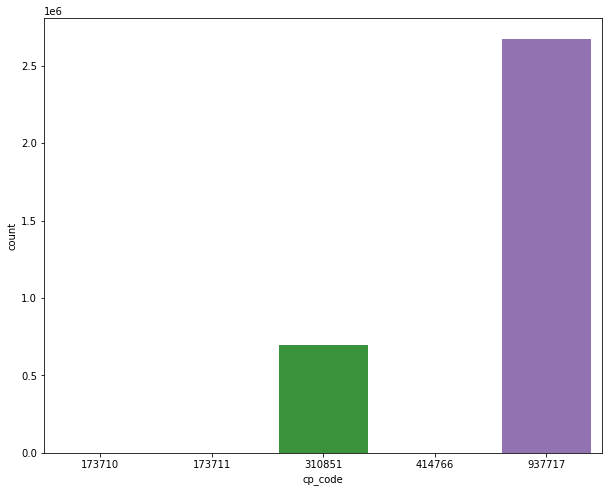

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x=df.cp_code)

<AxesSubplot:xlabel='cp_code', ylabel='count'>

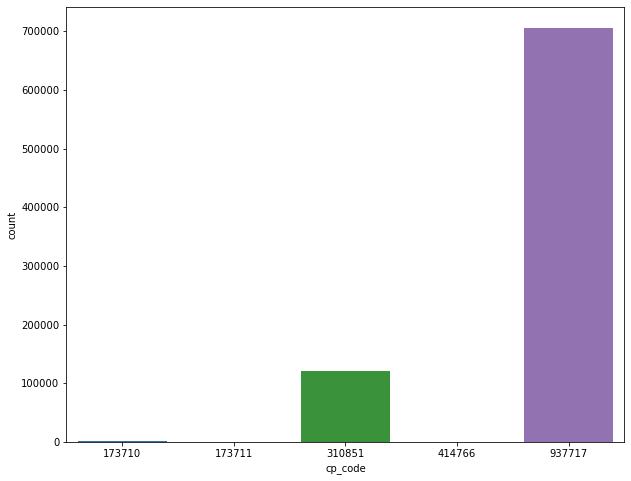

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(x=df2.cp_code)

In [20]:
df[df.cp_code==173710],df[df.cp_code==173711],df[df.cp_code==414766]

(         cp_code request_id  obj_size  bytes_served  uncompressed_length  \
 41        173710     329559      5149          5149                    0   
 580       173710     329575      3975          3975                    0   
 715       173710     3297d6      3522          3522                    0   
 3955      173710     32985e      2156          2156                    0   
 4594      173710     32a516      3966          3966                    0   
 ...          ...        ...       ...           ...                  ...   
 3371001   173710     680137      2180          2180                    0   
 3372973   173710     6806f4      2175          2175                    0   
 3373220   173710     680f06      3480          3480                    0   
 3375311   173710     680f47      2176          2176                    0   
 3375801   173710     681880      3475          3475                    0   
 
          new_connection  system_buffer  hoc  gzip_zip  gzip_unzip  ...  o

### All cp_code feature are having relevant data but handling categorical feature "cp_code" on the basis of their frequency of occurances into 3 categories as merging low occuring cp codes in the data sets into one category and performing one hot encoding.

In [21]:
df[(df.cp_code==173710)|(df.cp_code==173711)|(df.cp_code==414766)]=1
df=pd.concat([df,pd.get_dummies(df.cp_code)],axis=1)
df2[(df2.cp_code==173710)|(df2.cp_code==173711)|(df2.cp_code==414766)]=1
df2=pd.concat([df2,pd.get_dummies(df2.cp_code)],axis=1)
df.head()

cp_code request_id  obj_size  bytes_served  uncompressed_length  \
0   310851     329520   2412416       2412432                    0   
1   310851     32823e      5833           690                 5833   
2   310851     32825f   2412416       2412432                    0   
3   310851     328272   2412416       2412432                    0   
4   310851     328252   2412416       2412432                    0   

   new_connection  system_buffer  hoc  gzip_zip  gzip_unzip  ...  gzu_usecs  \
0               1              1    0         0           0  ...          0   
1               0              0    1         1           1  ...         12   
2               0              1    0         0           0  ...          0   
3               0              1    0         0           0  ...          0   
4               0              1    0         0           0  ...          0   

   gzc_usecs  agg_flytes  cpu_flytes  disk_flytes  ssl_flytes  \
0          0       33151      451980            0          73   
1         96        4658      127493            0        3703   
2          0       29685      357129            0        1773   
3          0       30240      372340            0        2164   
4          0       24896      181943            0        1047   

   mdt_application_usecs  1  310851  937717  
0                   1071  0       1       0  
1                   1258  0       1       0  
2                    787  0       1       0  
3                    924  0       1       0  
4                    792  0       1       0  

[5 rows x 36 columns]

### Dropping the irrelevant columns on one-hot encoding feature "cp_code"

In [22]:
df.drop(["cp_code",1],axis=1,inplace=True)
df2.drop(["cp_code",1],axis=1,inplace=True)
df.rename(columns={310851: 'cp_code_310851',937717:'cp_code_937717'},inplace=True)
df2.rename(columns={310851: 'cp_code_310851',937717:'cp_code_937717'},inplace=True)

In [23]:
df.columns,df2.columns

(Index(['request_id', 'obj_size', 'bytes_served', 'uncompressed_length',
        'new_connection', 'system_buffer', 'hoc', 'gzip_zip', 'gzip_unzip',
        'synchronous_refresh', 'parent_hit', 'icp_peer_hit',
        'prefetching_trigger', 'session_ticket', 'cryptoserver_keysigning',
        'sni', 'live_stream', 'ssl', 'ssl_encryption_aes_256_gcm',
        'ssl_keysigning_ecdsa', 'ssl_encryption_aes_128_gcm', 'cca_bbr', 'ocl',
        'phtm_usecs', 'ssl_usecs', 'gzu_usecs', 'gzc_usecs', 'agg_flytes',
        'cpu_flytes', 'disk_flytes', 'ssl_flytes', 'mdt_application_usecs',
        'cp_code_310851', 'cp_code_937717'],
       dtype='object'),
 Index(['request_id', 'obj_size', 'bytes_served', 'uncompressed_length',
        'new_connection', 'system_buffer', 'hoc', 'disk', 'gzip_zip',
        'gzip_unzip', 'synchronous_refresh', 'parent_hit', 'icp_peer_hit',
        'prefetching_trigger', 'session_ticket', 'cryptoserver_keysigning',
        'sni', 'live_stream', 'ssl', 'ssl_encryption_

In [24]:
df.shape,df2.shape

((3375862, 34), (828540, 35))

In [25]:
df.request_id.value_counts(),df.request_id.value_counts().index

(1         1815
 618130       1
 419226       1
 44e7a2       1
 4a54ad       1
           ... 
 33c7d3       1
 3bb5f8       1
 6307b7       1
 34843d       1
 3c0e4f       1
 Name: request_id, Length: 3374048, dtype: int64,
 Index([       1, '618130', '419226', '44e7a2', '4a54ad', '61cc3f', '618312',
        '43a28e', '65ffe2', '3ae00f',
        ...
        '58293f', '3f48a8', '32f9bd', '606d98', '3bfa5c', '33c7d3', '3bb5f8',
        '6307b7', '34843d', '3c0e4f'],
       dtype='object', length=3374048))

## In log1 dataset feature "request_id" have values unique to particular request i.e. datapoints and is not be useful in our linear regression model.

In [26]:
df.drop(["request_id"],axis=1,inplace=True)

In [27]:
df.head()

obj_size  bytes_served  uncompressed_length  new_connection  system_buffer  \
0   2412416       2412432                    0               1              1   
1      5833           690                 5833               0              0   
2   2412416       2412432                    0               0              1   
3   2412416       2412432                    0               0              1   
4   2412416       2412432                    0               0              1   

   hoc  gzip_zip  gzip_unzip  synchronous_refresh  parent_hit  ...  ssl_usecs  \
0    0         0           0                    0           0  ...         78   
1    1         1           1                    0           0  ...          0   
2    0         0           0                    0           0  ...          0   
3    0         0           0                    0           0  ...          0   
4    0         0           0                    0           0  ...          0   

   gzu_usecs  gzc_usecs  agg_flytes  cpu_flytes  disk_flytes  ssl_flytes  \
0          0          0       33151      451980            0          73   
1         12         96        4658      127493            0        3703   
2          0          0       29685      357129            0        1773   
3          0          0       30240      372340            0        2164   
4          0          0       24896      181943            0        1047   

   mdt_application_usecs  cp_code_310851  cp_code_937717  
0                   1071               1               0  
1                   1258               1               0  
2                    787               1               0  
3                    924               1               0  
4                    792               1               0  

[5 rows x 33 columns]

In [28]:
df2.request_id.value_counts(),df2.request_id.value_counts().index

(1         1959
 31977b       1
 2591a9       1
 2aa7e6       1
 2e95da       1
           ... 
 28bead       1
 25f7f3       1
 31d14c       1
 2b5286       1
 271a53       1
 Name: request_id, Length: 826582, dtype: int64,
 Index([       1, '31977b', '2591a9', '2aa7e6', '2e95da', '2e02b9', '2ed19a',
        '287250', '2816bb', '2a8207',
        ...
        '25d5c8', '2940be', '30bb70', '2ff25e', '31a41b', '28bead', '25f7f3',
        '31d14c', '2b5286', '271a53'],
       dtype='object', length=826582))

### In log2 dataset some peculiar "request_id" with values 1 are seen need to delete as they seem to represent false records

In [29]:
df2[df2.request_id==1]

request_id  obj_size  bytes_served  uncompressed_length  \
0               1         1             1                    1   
1               1         1             1                    1   
2               1         1             1                    1   
3               1         1             1                    1   
4               1         1             1                    1   
...           ...       ...           ...                  ...   
817291          1         1             1                    1   
820564          1         1             1                    1   
821464          1         1             1                    1   
824503          1         1             1                    1   
828516          1         1             1                    1   

        new_connection  system_buffer  hoc  disk  gzip_zip  gzip_unzip  ...  \
0                    1              1    1     1         1           1  ...   
1                    1              1    1     1         1           1  ...   
2                    1              1    1     1         1           1  ...   
3                    1              1    1     1         1           1  ...   
4                    1              1    1     1         1           1  ...   
...                ...            ...  ...   ...       ...         ...  ...   
817291               1              1    1     1         1           1  ...   
820564               1              1    1     1         1           1  ...   
821464               1              1    1     1         1           1  ...   
824503               1              1    1     1         1           1  ...   
828516               1              1    1     1         1           1  ...   

        ssl_usecs  gzu_usecs  gzc_usecs  agg_flytes  cpu_flytes  disk_flytes  \
0               1          1          1           1           1            1   
1               1          1          1           1           1            1   
2               1          1          1           1           1            1   
3               1          1          1           1           1            1   
4               1          1          1           1           1            1   
...           ...        ...        ...         ...         ...          ...   
817291          1          1          1           1           1            1   
820564          1          1          1           1           1            1   
821464          1          1          1           1           1            1   
824503          1          1          1           1           1            1   
828516          1          1          1           1           1            1   

        ssl_flytes  mdt_application_usecs  cp_code_310851  cp_code_937717  
0                1                      1               0               0  
1                1                      1               0               0  
2                1                      1               0               0  
3                1                      1               0               0  
4                1                      1               0               0  
...            ...                    ...             ...             ...  
817291           1                      1               0               0  
820564           1                      1               0               0  
821464           1                      1               0               0  
824503           1                      1               0               0  
828516           1                      1               0               0  

[1959 rows x 35 columns]

In [30]:
df2=df2[df2["request_id"]!=1]

In [31]:
df2.shape,df2.request_id.value_counts()

((826581, 35),
 2f982f    1
 2d33d7    1
 2aa7e6    1
 2e95da    1
 2e02b9    1
          ..
 25f7f3    1
 31d14c    1
 2b5286    1
 322e96    1
 271a53    1
 Name: request_id, Length: 826581, dtype: int64)

In [32]:
# Dropping feature "request_id"
df2.drop(["request_id"],axis=1,inplace=True)

In [33]:
df2.head()

obj_size  bytes_served  uncompressed_length  new_connection  system_buffer  \
5       273           273                  768               1              0   
6       273           273                  768               1              0   
7       273           273                  768               1              0   
8       273           273                  768               1              0   
9       273           273                  768               1              0   

   hoc  disk  gzip_zip  gzip_unzip  synchronous_refresh  ...  ssl_usecs  \
5    1     0         0           0                    0  ...         32   
6    1     0         0           0                    0  ...         10   
7    1     0         0           0                    0  ...         33   
8    1     0         0           0                    0  ...         40   
9    1     0         0           0                    0  ...         42   

   gzu_usecs  gzc_usecs  agg_flytes  cpu_flytes  disk_flytes  ssl_flytes  \
5          0          0        6361       46889            0          30   
6          0          0        7078       52258            0           9   
7          0          0        2067       15073            0          30   
8          0          0        2175       15868            0          37   
9          0          0        2090       15223            0          39   

   mdt_application_usecs  cp_code_310851  cp_code_937717  
5                   2297               0               1  
6                   2720               0               1  
7                    311               0               1  
8                    305               0               1  
9                    308               0               1  

[5 rows x 34 columns]

In [34]:
df2.obj_size.unique(),df2.obj_size.value_counts()

(array([    273,     457, 2412416,     768,    2108,    2118,    2148,
           2138,    2128,   36981,    2158,    2178,    2168,   36679,
          36377,    2124,    2144,    2154,    2134,    5779,    2164,
           2174,    5833,    2184,    2194]),
 2412416    739352
 5779        30850
 5833        28367
 2118         4417
 457          4000
 273          4000
 2108         3662
 2128         2530
 36981        2000
 2134         1484
 2124         1236
 2138         1040
 36679        1000
 36377        1000
 2144          840
 2154          320
 2148          276
 2164           99
 2158           64
 2174           21
 2168           12
 768             4
 2178            3
 2184            2
 2194            2
 Name: obj_size, dtype: int64)

In [35]:
df.head()

obj_size  bytes_served  uncompressed_length  new_connection  system_buffer  \
0   2412416       2412432                    0               1              1   
1      5833           690                 5833               0              0   
2   2412416       2412432                    0               0              1   
3   2412416       2412432                    0               0              1   
4   2412416       2412432                    0               0              1   

   hoc  gzip_zip  gzip_unzip  synchronous_refresh  parent_hit  ...  ssl_usecs  \
0    0         0           0                    0           0  ...         78   
1    1         1           1                    0           0  ...          0   
2    0         0           0                    0           0  ...          0   
3    0         0           0                    0           0  ...          0   
4    0         0           0                    0           0  ...          0   

   gzu_usecs  gzc_usecs  agg_flytes  cpu_flytes  disk_flytes  ssl_flytes  \
0          0          0       33151      451980            0          73   
1         12         96        4658      127493            0        3703   
2          0          0       29685      357129            0        1773   
3          0          0       30240      372340            0        2164   
4          0          0       24896      181943            0        1047   

   mdt_application_usecs  cp_code_310851  cp_code_937717  
0                   1071               1               0  
1                   1258               1               0  
2                    787               1               0  
3                    924               1               0  
4                    792               1               0  

[5 rows x 33 columns]

In [36]:
df.shape

(3375862, 33)

In [37]:
df.isna().sum(),df2.isna().sum()

(obj_size                      0
 bytes_served                  0
 uncompressed_length           0
 new_connection                0
 system_buffer                 0
 hoc                           0
 gzip_zip                      0
 gzip_unzip                    0
 synchronous_refresh           0
 parent_hit                    0
 icp_peer_hit                  0
 prefetching_trigger           0
 session_ticket                0
 cryptoserver_keysigning       0
 sni                           0
 live_stream                   0
 ssl                           0
 ssl_encryption_aes_256_gcm    0
 ssl_keysigning_ecdsa          0
 ssl_encryption_aes_128_gcm    0
 cca_bbr                       0
 ocl                           0
 phtm_usecs                    0
 ssl_usecs                     0
 gzu_usecs                     0
 gzc_usecs                     0
 agg_flytes                    0
 cpu_flytes                    0
 disk_flytes                   0
 ssl_flytes                    0
 mdt_appli

<AxesSubplot:>

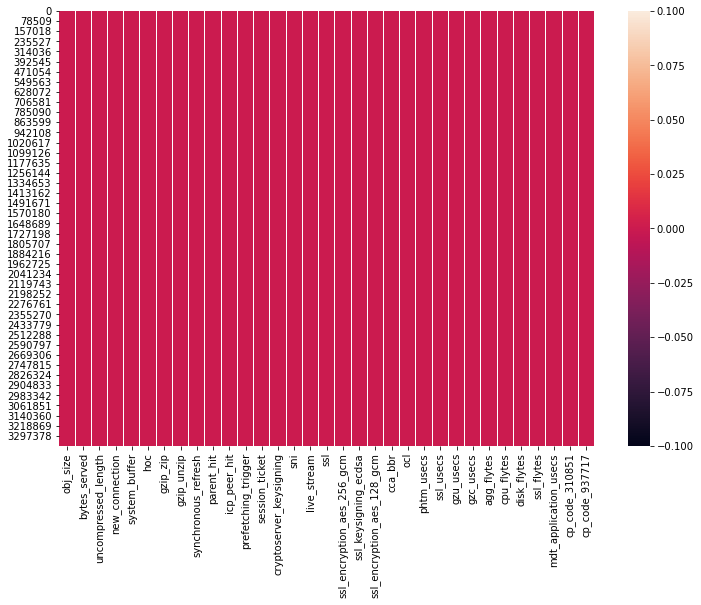

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isna())

# No missing values in any feature as such is observed.



In [38]:
df.dtypes,df2.dtypes

(obj_size                        int64
 bytes_served                    int64
 uncompressed_length             int64
 new_connection                  int64
 system_buffer                   int64
 hoc                             int64
 gzip_zip                        int64
 gzip_unzip                      int64
 synchronous_refresh             int64
 parent_hit                      int64
 icp_peer_hit                    int64
 prefetching_trigger             int64
 session_ticket                  int64
 cryptoserver_keysigning         int64
 sni                             int64
 live_stream                     int64
 ssl                             int64
 ssl_encryption_aes_256_gcm      int64
 ssl_keysigning_ecdsa            int64
 ssl_encryption_aes_128_gcm    float64
 cca_bbr                         int64
 ocl                             int64
 phtm_usecs                      int64
 ssl_usecs                       int64
 gzu_usecs                       int64
 gzc_usecs               

In [38]:
df.columns

Index(['obj_size', 'bytes_served', 'uncompressed_length', 'new_connection',
       'system_buffer', 'hoc', 'gzip_zip', 'gzip_unzip', 'synchronous_refresh',
       'parent_hit', 'icp_peer_hit', 'prefetching_trigger', 'session_ticket',
       'cryptoserver_keysigning', 'sni', 'live_stream', 'ssl',
       'ssl_encryption_aes_256_gcm', 'ssl_keysigning_ecdsa',
       'ssl_encryption_aes_128_gcm', 'cca_bbr', 'ocl', 'phtm_usecs',
       'ssl_usecs', 'gzu_usecs', 'gzc_usecs', 'agg_flytes', 'cpu_flytes',
       'disk_flytes', 'ssl_flytes', 'mdt_application_usecs', 'cp_code_310851',
       'cp_code_937717'],
      dtype='object')

## Going through all the feature and checking for anamolies or wrong values in the dataset.

In [40]:
## for dataset log1
for i in df.columns:
    print(df[i].value_counts())

36679      667873
2108       470927
2412416    403398
36075      333941
37283      333930
2118       332291
2098       320303
2128       150816
5833       144854
5779       142396
2138        49604
2148        12676
2158         2517
5941         2000
5887         2000
1            1815
2144         1484
2134         1265
2154          808
2168          440
2164          321
2174          100
2178           65
2184           20
2188            9
2194            6
768             2
2198            1
Name: obj_size, dtype: int64
1165       667871
2412432    403397
1168       333942
1173       333931
525        255544
526        252908
524        205575
527        195536
690        143628
523        130474
528        117364
688         72377
691         71245
522         65182
529         54545
521         26041
530         19473
520          8007
531          5283
519          2022
694          2000
1            1815
532          1016
695          1000
693          1000
554           792

In [39]:
df[df.obj_size==1]

obj_size  bytes_served  uncompressed_length  new_connection  \
41              1             1                    1               1   
580             1             1                    1               1   
715             1             1                    1               1   
3955            1             1                    1               1   
4594            1             1                    1               1   
...           ...           ...                  ...             ...   
3371001         1             1                    1               1   
3372973         1             1                    1               1   
3373220         1             1                    1               1   
3375311         1             1                    1               1   
3375801         1             1                    1               1   

         system_buffer  hoc  gzip_zip  gzip_unzip  synchronous_refresh  \
41                   1    1         1           1                    1   
580                  1    1         1           1                    1   
715                  1    1         1           1                    1   
3955                 1    1         1           1                    1   
4594                 1    1         1           1                    1   
...                ...  ...       ...         ...                  ...   
3371001              1    1         1           1                    1   
3372973              1    1         1           1                    1   
3373220              1    1         1           1                    1   
3375311              1    1         1           1                    1   
3375801              1    1         1           1                    1   

         parent_hit  ...  ssl_usecs  gzu_usecs  gzc_usecs  agg_flytes  \
41                1  ...          1          1          1           1   
580               1  ...          1          1          1           1   
715               1  ...          1          1          1           1   
3955              1  ...          1          1          1           1   
4594              1  ...          1          1          1           1   
...             ...  ...        ...        ...        ...         ...   
3371001           1  ...          1          1          1           1   
3372973           1  ...          1          1          1           1   
3373220           1  ...          1          1          1           1   
3375311           1  ...          1          1          1           1   
3375801           1  ...          1          1          1           1   

         cpu_flytes  disk_flytes  ssl_flytes  mdt_application_usecs  \
41                1            1           1                      1   
580               1            1           1                      1   
715               1            1           1                      1   
3955              1            1           1                      1   
4594              1            1           1                      1   
...             ...          ...         ...                    ...   
3371001           1            1           1                      1   
3372973           1            1           1                      1   
3373220           1            1           1                      1   
3375311           1            1           1                      1   
3375801           1            1           1                      1   

         cp_code_310851  cp_code_937717  
41                    0               0  
580                   0               0  
715                   0               0  
3955                  0               0  
4594                  0               0  
...                 ...             ...  
3371001               0               0  
3372973               0               0  
3373220               0               0  
3375311               0               0  
3375801               0               0  

[1815 rows x 33 colu

## Clearly the feature having the "obj_size" as 1 are having wrong values throughout the data set as all values are 1 for such "obj_size" and hence required to remove these 1815 values.

In [40]:
df.shape

(3375862, 33)

In [41]:
df=df[df.obj_size!=1]

In [42]:
df.shape

(3374047, 33)

In [43]:
## for dataset log2
for i in df2.columns:
    print(df2[i].value_counts())

2412416    739352
5779        30850
5833        28367
2118         4417
457          4000
273          4000
2108         3662
2128         2530
36981        2000
2134         1484
2124         1236
2138         1040
36679        1000
36377        1000
2144          840
2154          320
2148          276
2164           99
2158           64
2174           21
2168           12
768             4
2178            3
2184            2
2194            2
Name: obj_size, dtype: int64
2412432    404806
2412416    334545
690         29716
691         15304
688         14197
2            4000
273          4000
457          4000
1170         2000
2118         1465
2108         1212
1169         1000
1168         1000
2128          850
526           826
525           787
552           723
553           715
554           639
527           638
551           582
524           576
528           429
555           393
550           362
2138          344
523           312
549           227
529           161

In [44]:
df2.head()

obj_size  bytes_served  uncompressed_length  new_connection  system_buffer  \
5       273           273                  768               1              0   
6       273           273                  768               1              0   
7       273           273                  768               1              0   
8       273           273                  768               1              0   
9       273           273                  768               1              0   

   hoc  disk  gzip_zip  gzip_unzip  synchronous_refresh  ...  ssl_usecs  \
5    1     0         0           0                    0  ...         32   
6    1     0         0           0                    0  ...         10   
7    1     0         0           0                    0  ...         33   
8    1     0         0           0                    0  ...         40   
9    1     0         0           0                    0  ...         42   

   gzu_usecs  gzc_usecs  agg_flytes  cpu_flytes  disk_flytes  ssl_flytes  \
5          0          0        6361       46889            0          30   
6          0          0        7078       52258            0           9   
7          0          0        2067       15073            0          30   
8          0          0        2175       15868            0          37   
9          0          0        2090       15223            0          39   

   mdt_application_usecs  cp_code_310851  cp_code_937717  
5                   2297               0               1  
6                   2720               0               1  
7                    311               0               1  
8                    305               0               1  
9                    308               0               1  

[5 rows x 34 columns]

In [43]:
df_without_outlier_treatement=df.copy()

In [44]:
df_without_outlier_treatement.head()

obj_size  bytes_served  uncompressed_length  new_connection  system_buffer  \
0   2412416       2412432                    0               1              1   
1      5833           690                 5833               0              0   
2   2412416       2412432                    0               0              1   
3   2412416       2412432                    0               0              1   
4   2412416       2412432                    0               0              1   

   hoc  gzip_zip  gzip_unzip  synchronous_refresh  parent_hit  ...  ssl_usecs  \
0    0         0           0                    0           0  ...         78   
1    1         1           1                    0           0  ...          0   
2    0         0           0                    0           0  ...          0   
3    0         0           0                    0           0  ...          0   
4    0         0           0                    0           0  ...          0   

   gzu_usecs  gzc_usecs  agg_flytes  cpu_flytes  disk_flytes  ssl_flytes  \
0          0          0       33151      451980            0          73   
1         12         96        4658      127493            0        3703   
2          0          0       29685      357129            0        1773   
3          0          0       30240      372340            0        2164   
4          0          0       24896      181943            0        1047   

   mdt_application_usecs  cp_code_310851  cp_code_937717  
0                   1071               1               0  
1                   1258               1               0  
2                    787               1               0  
3                    924               1               0  
4                    792               1               0  

[5 rows x 33 columns]

In [45]:
df.loc[1]

obj_size                        5833.0
bytes_served                     690.0
uncompressed_length             5833.0
new_connection                     0.0
system_buffer                      0.0
hoc                                1.0
gzip_zip                           1.0
gzip_unzip                         1.0
synchronous_refresh                0.0
parent_hit                         0.0
icp_peer_hit                       0.0
prefetching_trigger                0.0
session_ticket                     0.0
cryptoserver_keysigning            0.0
sni                                1.0
live_stream                        1.0
ssl                                1.0
ssl_encryption_aes_256_gcm         1.0
ssl_keysigning_ecdsa               0.0
ssl_encryption_aes_128_gcm         0.0
cca_bbr                            1.0
ocl                             5833.0
phtm_usecs                      1909.0
ssl_usecs                          0.0
gzu_usecs                         12.0
gzc_usecs                

# Handling outliers
## Following strict handling of outliers

In [46]:
#Outlier detection using 1.5 IQR Rule

def outlier_limits(arr):
    IQR= arr.quantile(.75)-arr.quantile(.25)
    return arr.quantile(.25)-1.5*IQR, arr.quantile(.75)+1.5*IQR

In [47]:
df.columns

Index(['obj_size', 'bytes_served', 'uncompressed_length', 'new_connection',
       'system_buffer', 'hoc', 'gzip_zip', 'gzip_unzip', 'synchronous_refresh',
       'parent_hit', 'icp_peer_hit', 'prefetching_trigger', 'session_ticket',
       'cryptoserver_keysigning', 'sni', 'live_stream', 'ssl',
       'ssl_encryption_aes_256_gcm', 'ssl_keysigning_ecdsa',
       'ssl_encryption_aes_128_gcm', 'cca_bbr', 'ocl', 'phtm_usecs',
       'ssl_usecs', 'gzu_usecs', 'gzc_usecs', 'agg_flytes', 'cpu_flytes',
       'disk_flytes', 'ssl_flytes', 'mdt_application_usecs', 'cp_code_310851',
       'cp_code_937717'],
      dtype='object')

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='obj_size'>

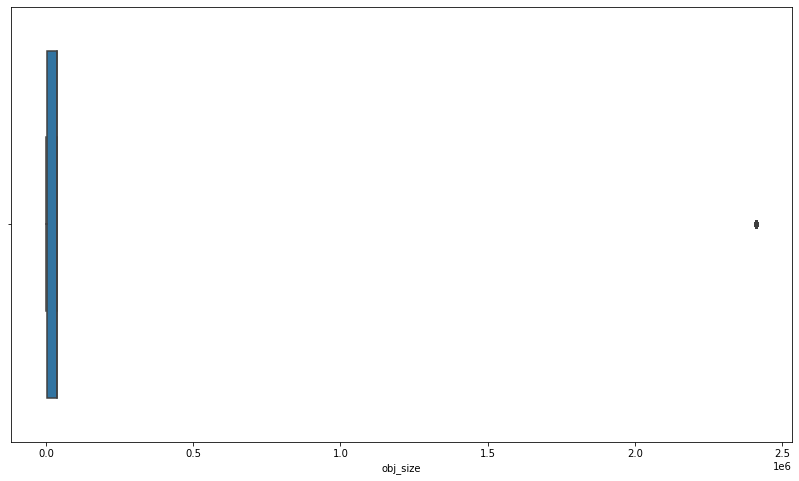

In [268]:
plt.figure(figsize = (14,8))
sns.boxplot(df.obj_size)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


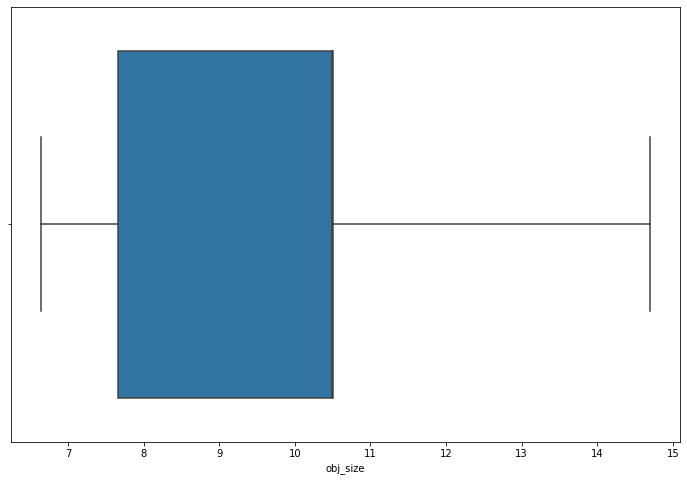

In [269]:
plt.figure(figsize = (12,8))
sns.boxplot(np.log(df.obj_size));

In [48]:
lim=outlier_limits(np.log(df.obj_size))
df[np.log(df.obj_size)>lim[1]]

Empty DataFrame
Columns: [obj_size, bytes_served, uncompressed_length, new_connection, system_buffer, hoc, gzip_zip, gzip_unzip, synchronous_refresh, parent_hit, icp_peer_hit, prefetching_trigger, session_ticket, cryptoserver_keysigning, sni, live_stream, ssl, ssl_encryption_aes_256_gcm, ssl_keysigning_ecdsa, ssl_encryption_aes_128_gcm, cca_bbr, ocl, phtm_usecs, ssl_usecs, gzu_usecs, gzc_usecs, agg_flytes, cpu_flytes, disk_flytes, ssl_flytes, mdt_application_usecs, cp_code_310851, cp_code_937717]
Index: []

[0 rows x 33 columns]

### In dataset feature "obj_size" is having a large variation between different values so taking log of "obj_size" and making a new column "log_obj_size". 

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bytes_served'>

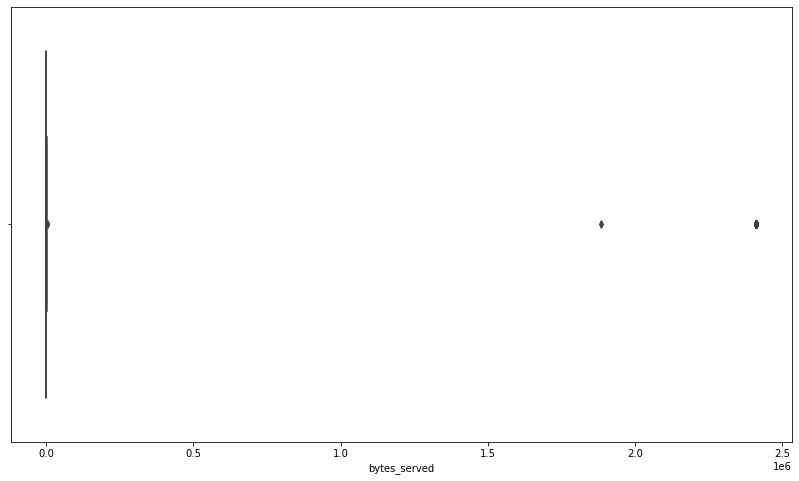

In [271]:
plt.figure(figsize = (14,8))
sns.boxplot(df.bytes_served)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


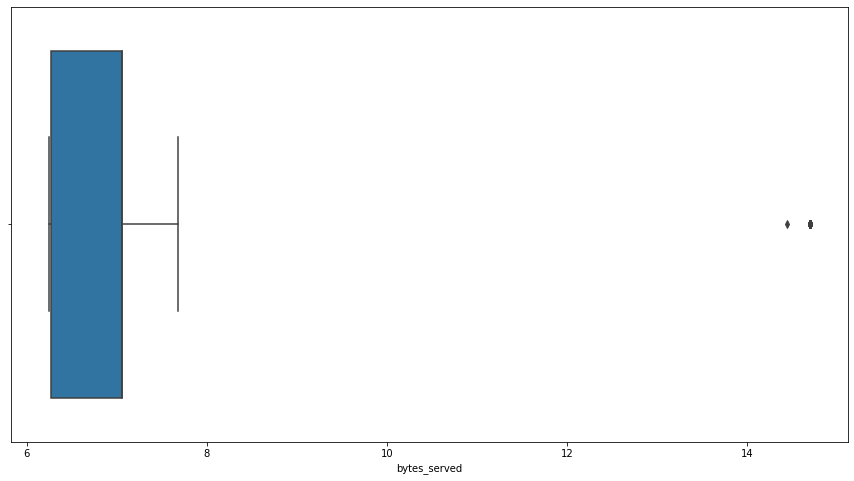

In [272]:
plt.figure(figsize = (15,8))
sns.boxplot(np.log(df.bytes_served));

In [273]:
lim=outlier_limits((df.bytes_served))
df[(df.bytes_served)>lim[1]]

obj_size  bytes_served  uncompressed_length  new_connection  \
0         2412416       2412432                    0               1   
2         2412416       2412432                    0               0   
3         2412416       2412432                    0               0   
4         2412416       2412432                    0               0   
9         2412416       2412432                    0               0   
...           ...           ...                  ...             ...   
3375857   2412416       2412432                    0               0   
3375858   2412416       2412432                    0               0   
3375859   2412416       2412432                    0               0   
3375860   2412416       2412432                    0               0   
3375861   2412416       2412432                    0               0   

         system_buffer  hoc  gzip_zip  gzip_unzip  synchronous_refresh  \
0                    1    0         0           0                    0   
2                    1    0         0           0                    0   
3                    1    0         0           0                    0   
4                    1    0         0           0                    0   
9                    1    0         0           0                    0   
...                ...  ...       ...         ...                  ...   
3375857              1    0         0           0                    0   
3375858              1    0         0           0                    0   
3375859              1    0         0           0                    0   
3375860              1    0         0           0                    0   
3375861              1    0         0           0                    0   

         parent_hit  ...  ssl_usecs  gzu_usecs  gzc_usecs  agg_flytes  \
0                 0  ...         78          0          0       33151   
2                 0  ...          0          0          0       29685   
3                 0  ...          0          0          0       30240   
4                 0  ...          0          0          0       24896   
9                 0  ...          0          0          0       27092   
...             ...  ...        ...        ...        ...         ...   
3375857           0  ...          0          0          0       33623   
3375858           0  ...          0          0          0       33783   
3375859           0  ...          0          0          0       34802   
3375860           0  ...          0          0          0       31778   
3375861           0  ...          0          0          0       32856   

         cpu_flytes  disk_flytes  ssl_flytes  mdt_application_usecs  \
0            451980            0          73                   1071   
2            357129            0        1773                    787   
3            372340            0        2164                    924   
4            181943            0        1047                    792   
9            279575            0        1434                   1137   
...             ...          ...         ...                    ...   
3375857      270115            0        1926                    741   
3375858      272698            0        1877                    731   
3375859      289225            0        3336                   1202   
3375860      240036            0        3659                   1270   
3375861      258734            0        2831                    937   

         cp_code_310851  cp_code_937717  
0                     1               0  
2                     1               0  
3                     1               0  
4                     1               0  
9                     1               0  
...                 ...             ...  
3375857               1               0  
3375858               1               0  
3375859               1               0  
3375860               1               0  
3375861               1               0  

[403403 rows x 33 co

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


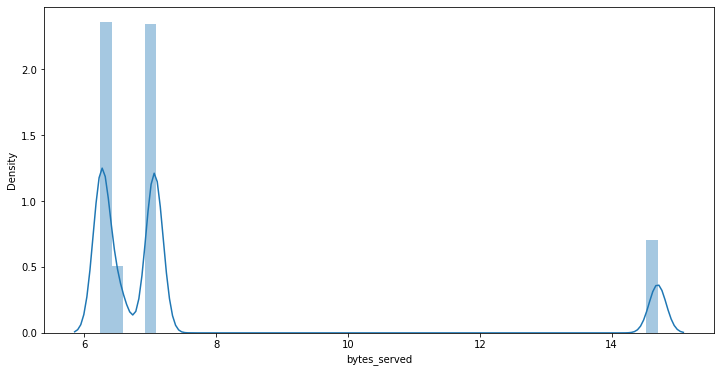

In [274]:
plt.figure(figsize = (12,6))
sns.distplot(np.log(df.bytes_served));

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


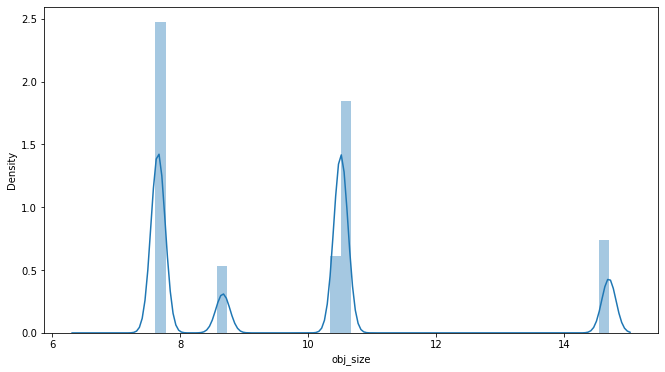

In [275]:
plt.figure(figsize = (11,6))
sns.distplot(np.log(df.obj_size));

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


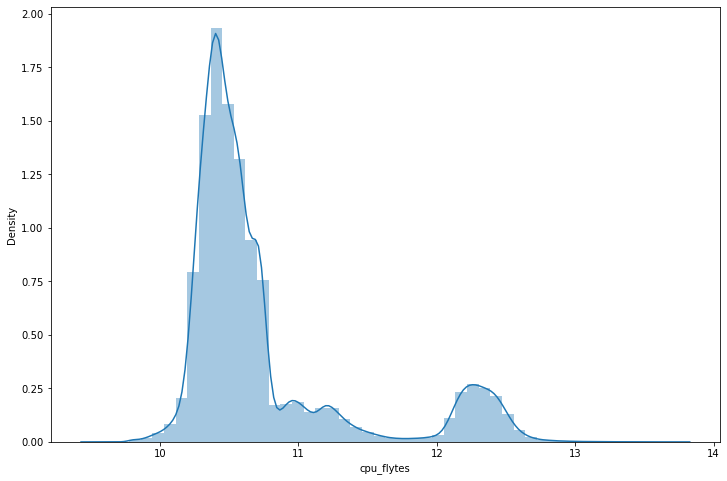

In [276]:
plt.figure(figsize = (12,8))
sns.distplot(np.log(df.cpu_flytes));

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


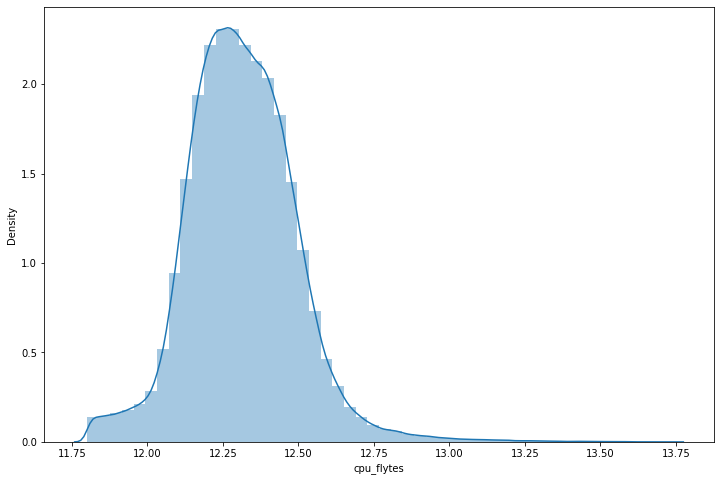

In [60]:
plt.figure(figsize = (12,8))
sns.distplot(np.log(df.cpu_flytes[df.cpu_flytes>np.exp(11.8)]));

In [260]:
df[np.log(df.cpu_flytes)>12.4]

obj_size  bytes_served  uncompressed_length  new_connection  \
0         2412416       2412432                    0               1   
2         2412416       2412432                    0               0   
3         2412416       2412432                    0               0   
9         2412416       2412432                    0               0   
11        2412416       2412432                    0               0   
...           ...           ...                  ...             ...   
3375848   2412416       2412432                    0               0   
3375857   2412416       2412432                    0               0   
3375858   2412416       2412432                    0               0   
3375859   2412416       2412432                    0               0   
3375861   2412416       2412432                    0               0   

         system_buffer  hoc  gzip_zip  gzip_unzip  synchronous_refresh  \
0                    1    0         0           0                    0   
2                    1    0         0           0                    0   
3                    1    0         0           0                    0   
9                    1    0         0           0                    0   
11                   1    0         0           0                    0   
...                ...  ...       ...         ...                  ...   
3375848              1    0         0           0                    0   
3375857              1    0         0           0                    0   
3375858              1    0         0           0                    0   
3375859              1    0         0           0                    0   
3375861              1    0         0           0                    0   

         parent_hit  ...  ssl_usecs  gzu_usecs  gzc_usecs  agg_flytes  \
0                 0  ...         78          0          0       33151   
2                 0  ...          0          0          0       29685   
3                 0  ...          0          0          0       30240   
9                 0  ...          0          0          0       27092   
11                0  ...          0          0          0       26254   
...             ...  ...        ...        ...        ...         ...   
3375848           0  ...          0          0          0       31379   
3375857           0  ...          0          0          0       33623   
3375858           0  ...          0          0          0       33783   
3375859           0  ...          0          0          0       34802   
3375861           0  ...          0          0          0       32856   

         cpu_flytes  disk_flytes  ssl_flytes  mdt_application_usecs  \
0            451980            0          73                   1071   
2            357129            0        1773                    787   
3            372340            0        2164                    924   
9            279575            0        1434                   1137   
11           257127            0        1379                   1087   
...             ...          ...         ...                    ...   
3375848      275654            0        2180                   1016   
3375857      270115            0        1926                    741   
3375858      272698            0        1877                    731   
3375859      289225            0        3336                   1202   
3375861      258734            0        2831                    937   

         cp_code_310851  cp_code_937717  
0                     1               0  
2                     1               0  
3                     1               0  
9                     1               0  
11                    1               0  
...                 ...             ...  
3375848               1               0  
3375857               1               0  
3375858               1               0  
3375859               1               0  
3375861               1               0  

[115747 rows x 33 co

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


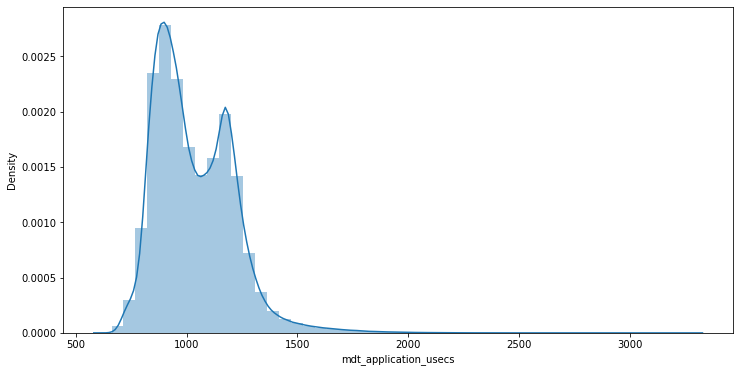

In [61]:
plt.figure(figsize = (12,6))
sns.distplot((df.mdt_application_usecs));

## It is observed that their are 403398 datapoints in log1 datasets which are outliers for feature "log_bytes_served" and are causing irregularity in distribution in all other features too hence, removing these outliers.

In [49]:
lim=outlier_limits((df.bytes_served))
df.drop(df[(df.bytes_served)>lim[1]].index,inplace=True)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


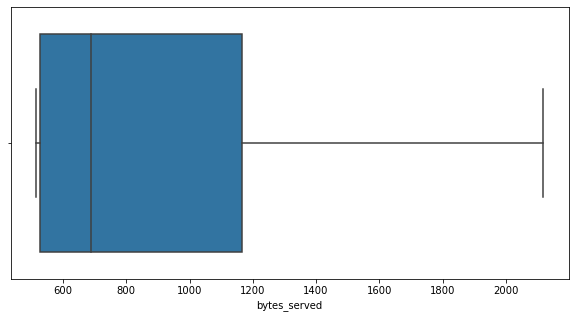

In [59]:
plt.figure(figsize = (10,5))
sns.boxplot((df.bytes_served));

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


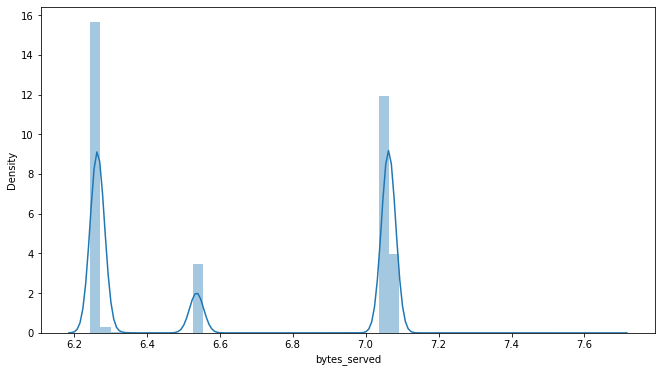

In [93]:
plt.figure(figsize = (11,6))
sns.distplot(np.log(df.bytes_served));

In [50]:
df.cryptoserver_keysigning.value_counts()

0    2888617
1      82027
Name: cryptoserver_keysigning, dtype: int64

In [51]:
df.new_connection.value_counts()

0    2888615
1      82029
Name: new_connection, dtype: int64

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


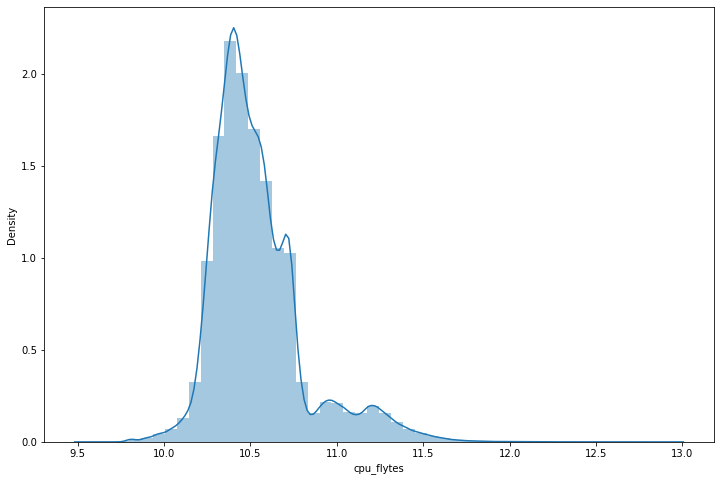

In [67]:
plt.figure(figsize = (12,8))
sns.distplot(np.log(df.cpu_flytes));

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


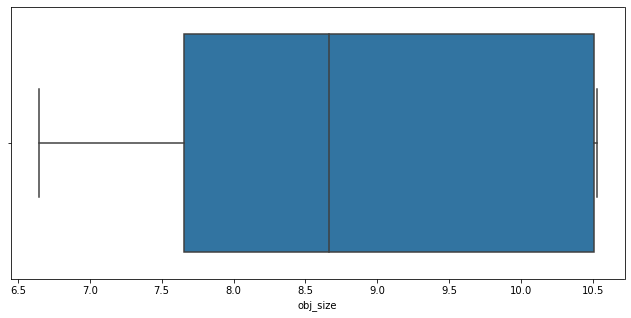

In [68]:
plt.figure(figsize = (11,5))
sns.boxplot(np.log(df.obj_size));

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


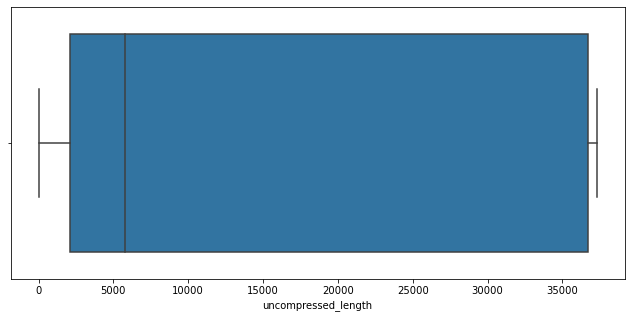

In [69]:
plt.figure(figsize = (11,5))
sns.boxplot((df.uncompressed_length));

In [70]:
df.iloc[:,15:].head()

live_stream  ssl  ssl_encryption_aes_256_gcm  ssl_keysigning_ecdsa  \
1            1    1                           1                     0   
5            1    1                           1                     0   
6            1    1                           1                     0   
7            1    1                           1                     0   
8            1    1                           1                     0   

   ssl_encryption_aes_128_gcm  cca_bbr   ocl  phtm_usecs  ssl_usecs  \
1                         0.0        1  5833        1909          0   
5                         0.0        1  5833        1468          0   
6                         0.0        1  5833        1874          0   
7                         0.0        1  5833        2230          0   
8                         0.0        1  5833        1860          0   

   gzu_usecs  gzc_usecs  agg_flytes  cpu_flytes  disk_flytes  ssl_flytes  \
1         12         96        4658      127493            0        3703   
5         14         78        2380       52372            0        1559   
6         17        110        3037       66858            0        2234   
7         16        111        3610       79559            0        2700   
8         11         90        2745       73293            0        1891   

   mdt_application_usecs  cp_code_310851  cp_code_937717  
1                   1258               1               0  
5                    922               1               0  
6                   1247               1               0  
7                   1463               1               0  
8                   1248               1               0

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


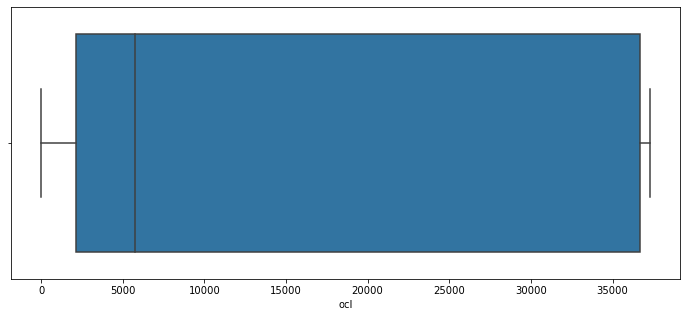

In [71]:
plt.figure(figsize = (12,5))
sns.boxplot((df.ocl));

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


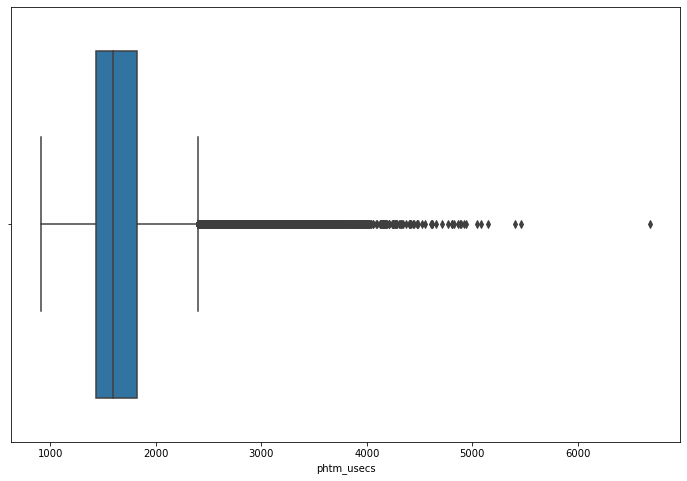

In [72]:
plt.figure(figsize = (12,8))
sns.boxplot((df.phtm_usecs));

In [109]:
lim=outlier_limits((df.phtm_usecs))
df[((df.phtm_usecs)>lim[1])|((df.phtm_usecs)<lim[0])]

obj_size  bytes_served  uncompressed_length  new_connection  \
10           5833           690                 5833               0   
29           5833           691                 5833               0   
52           5833           691                 5833               0   
56           5833           690                 5833               1   
57           5833           690                 5833               1   
...           ...           ...                  ...             ...   
3269250      2144           556                 2144               1   
3269251      5941           694                 5941               0   
3269255      2144           553                 2144               1   
3269315      2144           555                 2144               1   
3269742      5941           694                 5941               0   

         system_buffer  hoc  gzip_zip  gzip_unzip  synchronous_refresh  \
10                   0    1         1           1                    0   
29                   1    0         1           1                    0   
52                   0    1         1           1                    0   
56                   1    0         1           1                    0   
57                   0    1         1           1                    0   
...                ...  ...       ...         ...                  ...   
3269250              1    0         1           0                    0   
3269251              0    1         1           1                    0   
3269255              0    1         1           0                    0   
3269315              0    1         1           0                    0   
3269742              1    0         1           1                    0   

         parent_hit  ...  ssl_usecs  gzu_usecs  gzc_usecs  agg_flytes  \
10                0  ...          0         13        103        3719   
29                0  ...          0         12        108        4244   
52                0  ...          0         18         79        4461   
56                0  ...         88         20        119        5146   
57                0  ...         86         17        113        5936   
...             ...  ...        ...        ...        ...         ...   
3269250           0  ...         81          0         71        3379   
3269251           0  ...          0         13        100        3554   
3269255           0  ...         41          0         75        3937   
3269315           0  ...         25          0         77        3210   
3269742           0  ...          0         19        101        1383   

         cpu_flytes  disk_flytes  ssl_flytes  mdt_application_usecs  \
10            99379            0        2870                   1667   
29            87510            0        3281                   1591   
52            92031            0        3617                   1775   
56           100110            0          82                   1529   
57           115570            0          80                   1701   
...             ...          ...         ...                    ...   
3269250       63212            0          75                   1385   
3269251       66578            0        2729                   1567   
3269255       66082            0          38                   1442   
3269315       67921            0          23                   1414   
3269742       41087            0         729                   1410   

         cp_code_310851  cp_code_937717  
10                    1               0  
29                    1               0  
52                    1               0  
56                    1               0  
57                    1               0  
...                 ...             ...  
3269250               1               0  
3269251               1               0  
3269255               1               0  
3269315               1               0  
3269742               1               0  

[57836 rows x 33 col

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


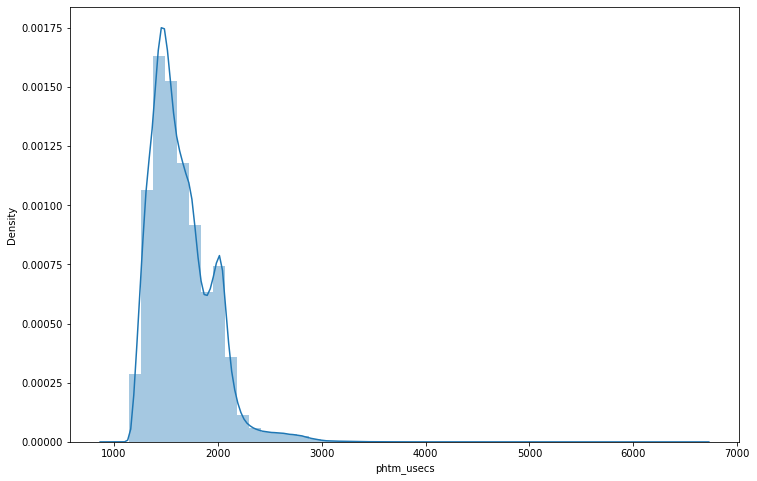

In [110]:
plt.figure(figsize = (12,8))
sns.distplot((df.phtm_usecs));

## Taking log of required features and handling the outlier in feature "phtm_usecs" in dataset log1.

In [111]:
df.head()

obj_size  bytes_served  uncompressed_length  new_connection  system_buffer  \
1      5833           690                 5833               0              0   
5      5833           690                 5833               0              1   
6      5833           690                 5833               0              0   
7      5833           690                 5833               0              0   
8      5833           690                 5833               0              0   

   hoc  gzip_zip  gzip_unzip  synchronous_refresh  parent_hit  ...  ssl_usecs  \
1    1         1           1                    0           0  ...          0   
5    0         1           1                    0           0  ...          0   
6    1         1           1                    0           0  ...          0   
7    1         1           1                    0           0  ...          0   
8    1         1           1                    0           0  ...          0   

   gzu_usecs  gzc_usecs  agg_flytes  cpu_flytes  disk_flytes  ssl_flytes  \
1         12         96        4658      127493            0        3703   
5         14         78        2380       52372            0        1559   
6         17        110        3037       66858            0        2234   
7         16        111        3610       79559            0        2700   
8         11         90        2745       73293            0        1891   

   mdt_application_usecs  cp_code_310851  cp_code_937717  
1                   1258               1               0  
5                    922               1               0  
6                   1247               1               0  
7                   1463               1               0  
8                   1248               1               0  

[5 rows x 33 columns]

In [52]:
lim=outlier_limits(df.phtm_usecs)
df.drop(df[(df.phtm_usecs<lim[0])|(df.phtm_usecs>lim[1])].index,inplace=True)
# df.drop(["obj_size","bytes_served","phtm_usecs"],axis=1,inplace=True)

In [63]:
df.cryptoserver_keysigning.value_counts(),df.new_connection.value_counts()

(0    2866622
 1      46186
 Name: cryptoserver_keysigning, dtype: int64,
 0    2866620
 1      46188
 Name: new_connection, dtype: int64)

## Around 40000 cryposerver_keysigning feature values are removed due to outlier treatement in phtm_usecs as they are producing some of the extreme values in phtm_usecs

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


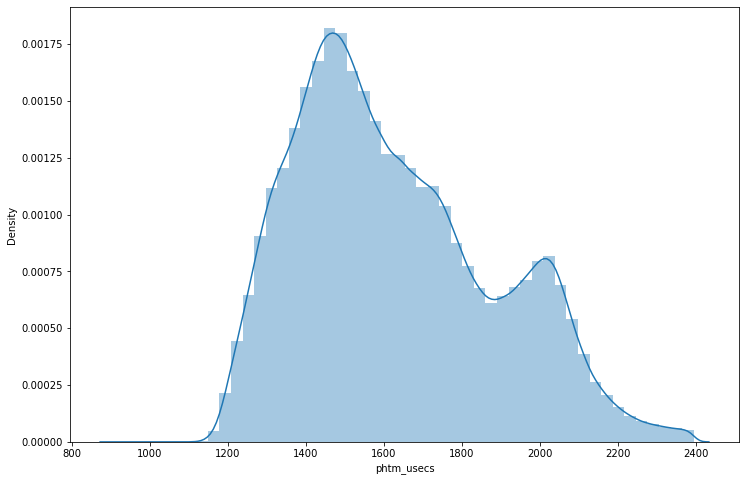

In [53]:
plt.figure(figsize = (12,8))
sns.distplot((df.phtm_usecs));

In [54]:
print(df.ssl_usecs.value_counts())
df.ssl_usecs.describe()

0       2866622
70          890
71          869
69          852
67          852
         ...   
254           1
256           1
258           1
260           1
1813          1
Name: ssl_usecs, Length: 279, dtype: int64


count    2.912808e+06
mean     1.158844e+00
std      1.002612e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.813000e+03
Name: ssl_usecs, dtype: float64

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


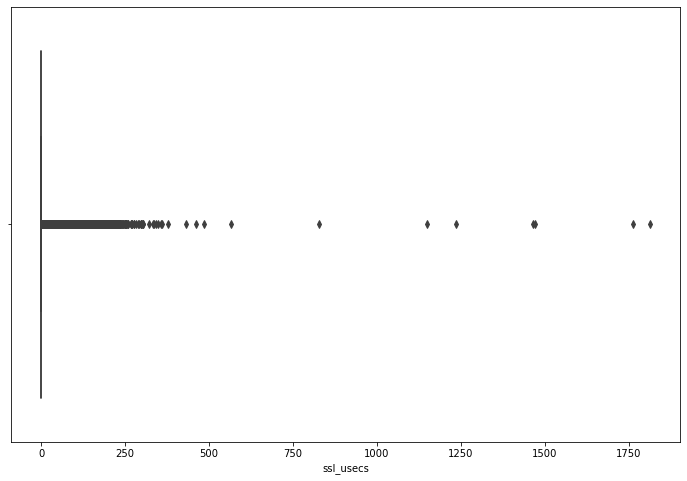

In [55]:
plt.figure(figsize = (12,8))
sns.boxplot((df.ssl_usecs));

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


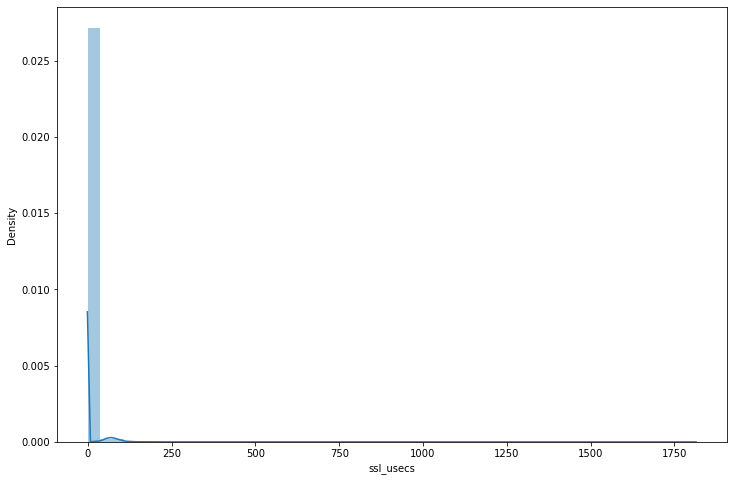

In [56]:
plt.figure(figsize = (12,8))
sns.distplot((df.ssl_usecs));

In [118]:
lim=outlier_limits((df.ssl_usecs))
df[(df.ssl_usecs)>lim[1]]

obj_size  bytes_served  uncompressed_length  new_connection  \
125          5833           690                 5833               1   
151          5833           690                 5833               1   
161          5833           690                 5833               1   
206          5833           690                 5833               1   
207          5833           690                 5833               1   
...           ...           ...                  ...             ...   
3269130      2134           552                 2134               1   
3269152      2154           556                 2154               1   
3269168      2144           557                 2144               1   
3269238      2134           554                 2134               1   
3269239      2134           551                 2134               1   

         system_buffer  hoc  gzip_zip  gzip_unzip  synchronous_refresh  \
125                  0    1         1           1                    0   
151                  1    0         1           1                    0   
161                  0    1         1           1                    0   
206                  0    1         1           1                    0   
207                  0    1         1           1                    0   
...                ...  ...       ...         ...                  ...   
3269130              0    1         1           0                    0   
3269152              1    0         1           0                    0   
3269168              1    0         1           0                    0   
3269238              0    1         1           0                    0   
3269239              0    1         1           0                    0   

         parent_hit  ...  ssl_usecs  gzu_usecs  gzc_usecs  agg_flytes  \
125               0  ...         67         17         89        3718   
151               0  ...         50         15         94        3194   
161               0  ...         77         21         92        4179   
206               0  ...         54         25         96        3296   
207               0  ...         48         14         90        3652   
...             ...  ...        ...        ...        ...         ...   
3269130           0  ...         79          0         63        3669   
3269152           0  ...         26          0         70        1751   
3269168           0  ...         55          0         64        1251   
3269238           0  ...         70          0         54        2961   
3269239           0  ...         29          0         60        2889   

         cpu_flytes  disk_flytes  ssl_flytes  mdt_application_usecs  \
125           80481            0          62                   1065   
151           75250            0          46                   1015   
161           81284            0          72                   1205   
206          103034            0          50                    994   
207          114250            0          45                   1156   
...             ...          ...         ...                    ...   
3269130       61758            0          74                   1243   
3269152       41020            0          24                   1427   
3269168       37026            0          51                   1089   
3269238       58329            0          65                   1154   
3269239       56925            0          27                   1089   

         cp_code_310851  cp_code_937717  
125                   1               0  
151                   1               0  
161                   1               0  
206                   1               0  
207                   1               0  
...                 ...             ...  
3269130               1               0  
3269152               1               0  
3269168               1               0  
3269238               1               0  
3269239               1               0  

[46186 rows x 33 col

## Feature "ssl_usecs" as a large no. of values are 0 only and only few are greater than zero and hence its highly positively skewed but it may be because of outliers in other features - on handling the outliers in "cpu_flytes" this problem is also resolved. 

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


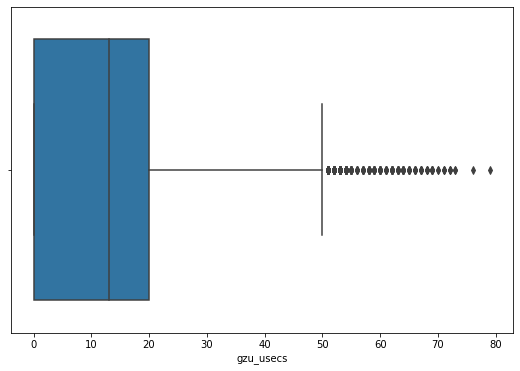

In [119]:
plt.figure(figsize = (9,6))
sns.boxplot((df.gzu_usecs));

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


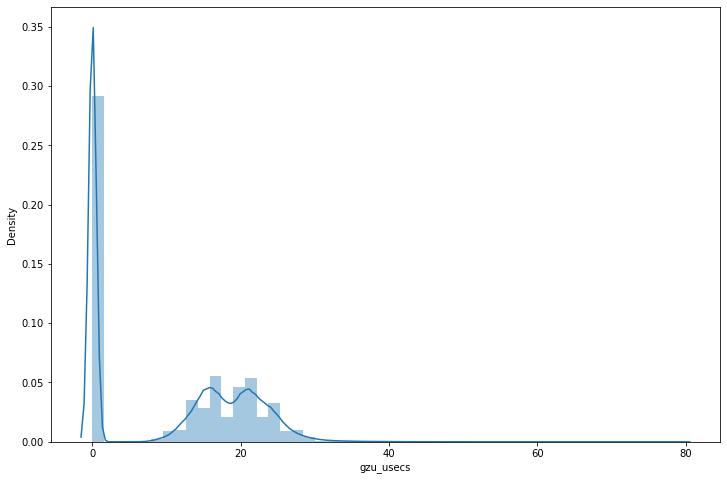

In [120]:
plt.figure(figsize = (12,8))
sns.distplot((df.gzu_usecs));

In [121]:
lim=outlier_limits((df.gzu_usecs))
df[(df.gzu_usecs)>lim[1]]

obj_size  bytes_served  uncompressed_length  new_connection  \
28435        5779           688                 5779               0   
47306        5833           691                 5833               0   
92657        5833           691                 5833               0   
118776       5833           690                 5833               0   
136042       5779           688                 5779               0   
...           ...           ...                  ...             ...   
3203256     36679          1173                36679               0   
3208744     36679          1168                36679               0   
3213468     36679          1168                36679               1   
3220437     36075          1165                36075               0   
3221317     36679          1173                36679               0   

         system_buffer  hoc  gzip_zip  gzip_unzip  synchronous_refresh  \
28435                0    1         1           1                    0   
47306                0    1         1           1                    0   
92657                1    0         1           1                    0   
118776               0    1         1           1                    0   
136042               0    1         1           1                    0   
...                ...  ...       ...         ...                  ...   
3203256              1    0         1           1                    0   
3208744              0    1         1           1                    0   
3213468              0    1         1           1                    0   
3220437              1    0         1           1                    0   
3221317              1    0         1           1                    0   

         parent_hit  ...  ssl_usecs  gzu_usecs  gzc_usecs  agg_flytes  \
28435             0  ...          0         58        100        3835   
47306             0  ...          0         57        129        4709   
92657             0  ...          0         54         99        4036   
118776            0  ...          0         52        111        4983   
136042            0  ...          0         72        150        5163   
...             ...  ...        ...        ...        ...         ...   
3203256           0  ...          0         52        343        3239   
3208744           0  ...          0         56        308        2899   
3213468           0  ...         67         63        277        4553   
3220437           0  ...          0         65        247        3577   
3221317           0  ...          0         51        345        4132   

         cpu_flytes  disk_flytes  ssl_flytes  mdt_application_usecs  \
28435         84389            0        2892                   1579   
47306         84321            0        3671                   1405   
92657         70552            0        2997                   1129   
118776        88128            0        3878                   1199   
136042        88487            0        4255                   1736   
...             ...          ...         ...                    ...   
3203256       35759            0        2316                    884   
3208744       32522            0        2021                    850   
3213468       44802            0          62                    873   
3220437       37154            0        2594                    977   
3221317       47045            0        3095                   1185   

         cp_code_310851  cp_code_937717  
28435                 1               0  
47306                 1               0  
92657                 1               0  
118776                1               0  
136042                1               0  
...                 ...             ...  
3203256               0               1  
3208744               0               1  
3213468               0               1  
3220437               0               1  
3221317               0               1  

[264 rows x 33 colum

In [122]:
df.cryptoserver_keysigning.value_counts(),df.new_connection.value_counts()

(0    2866622
 1      46186
 Name: cryptoserver_keysigning, dtype: int64,
 0    2866620
 1      46188
 Name: new_connection, dtype: int64)

In [57]:
lim=outlier_limits((df.gzu_usecs))
df.drop(df[(df.gzu_usecs)>lim[1]].index,inplace=True)

In [284]:
df.cryptoserver_keysigning.value_counts(),df.new_connection.value_counts()

(0    2866367
 1      46177
 Name: cryptoserver_keysigning, dtype: int64,
 0    2866365
 1      46179
 Name: new_connection, dtype: int64)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


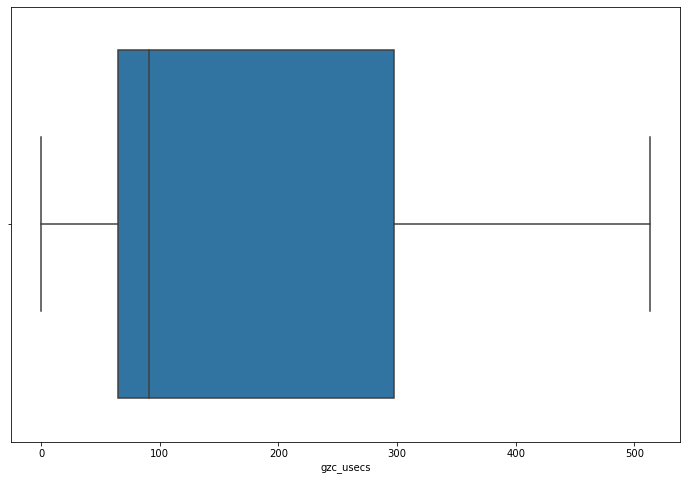

In [125]:
plt.figure(figsize = (12,8))
sns.boxplot((df.gzc_usecs));

## Dropping feature "agg_flytes" as its part of the dependent variable "cpu_flytes".

In [58]:
df.drop("agg_flytes",axis=1,inplace=True)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


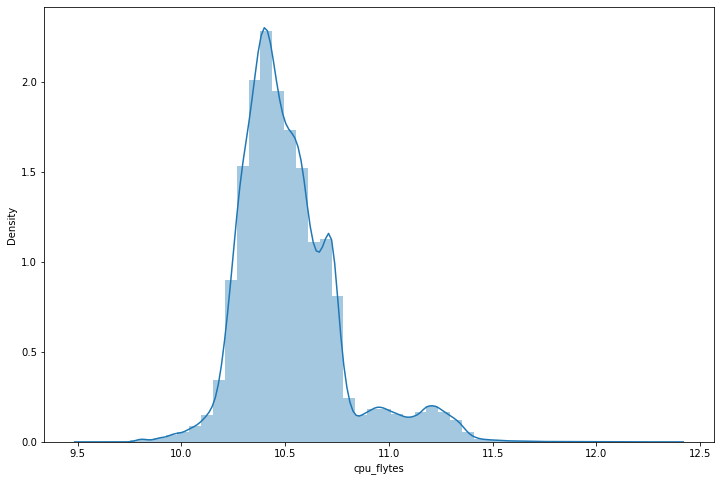

In [66]:
plt.figure(figsize = (12,8))
sns.distplot(np.log(df.cpu_flytes));

### Taking log of feature "cpu_flytes" and removing the outliers as they are representing some other distribution

In [59]:
df["log_cpu_flytes"]=np.log(df.cpu_flytes)

In [68]:
# # removing outliers
# lim=outlier_limits((df.cpu_flytes))
# df.drop(df[(df.cpu_flytes>lim[1])|(df.cpu_flytes<lim[0])].index,inplace=True)

In [69]:
df.cryptoserver_keysigning.value_counts(),df.new_connection.value_counts()

(0    2866367
 1      46177
 Name: cryptoserver_keysigning, dtype: int64,
 0    2866365
 1      46179
 Name: new_connection, dtype: int64)

In [60]:
def diagnostic_plot(variable):
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    variable.hist()
    
    plt.subplot(1,2,2)
    scipy.stats.probplot(variable,dist="norm",plot=plt)
    plt.show()

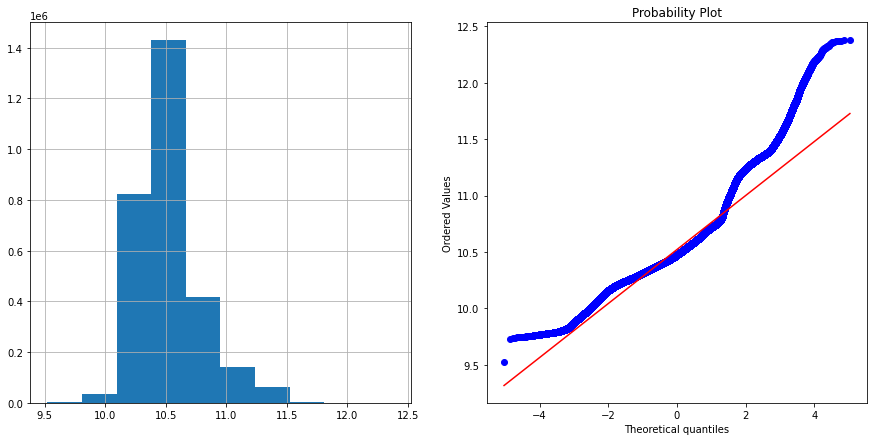

In [291]:
diagnostic_plot(df.log_cpu_flytes)

In [292]:
df.head()

obj_size  bytes_served  uncompressed_length  new_connection  system_buffer  \
1      5833           690                 5833               0              0   
5      5833           690                 5833               0              1   
6      5833           690                 5833               0              0   
7      5833           690                 5833               0              0   
8      5833           690                 5833               0              0   

   hoc  gzip_zip  gzip_unzip  synchronous_refresh  parent_hit  ...  ssl_usecs  \
1    1         1           1                    0           0  ...          0   
5    0         1           1                    0           0  ...          0   
6    1         1           1                    0           0  ...          0   
7    1         1           1                    0           0  ...          0   
8    1         1           1                    0           0  ...          0   

   gzu_usecs  gzc_usecs  cpu_flytes  disk_flytes  ssl_flytes  \
1         12         96      127493            0        3703   
5         14         78       52372            0        1559   
6         17        110       66858            0        2234   
7         16        111       79559            0        2700   
8         11         90       73293            0        1891   

   mdt_application_usecs  cp_code_310851  cp_code_937717  log_cpu_flytes  
1                   1258               1               0       11.755817  
5                    922               1               0       10.866127  
6                   1247               1               0       11.110326  
7                   1463               1               0       11.284254  
8                   1248               1               0       11.202220  

[5 rows x 33 columns]

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


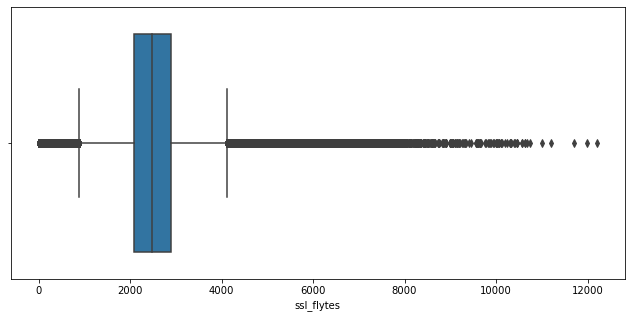

In [271]:
plt.figure(figsize = (11,5))
sns.boxplot((df.ssl_flytes));

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


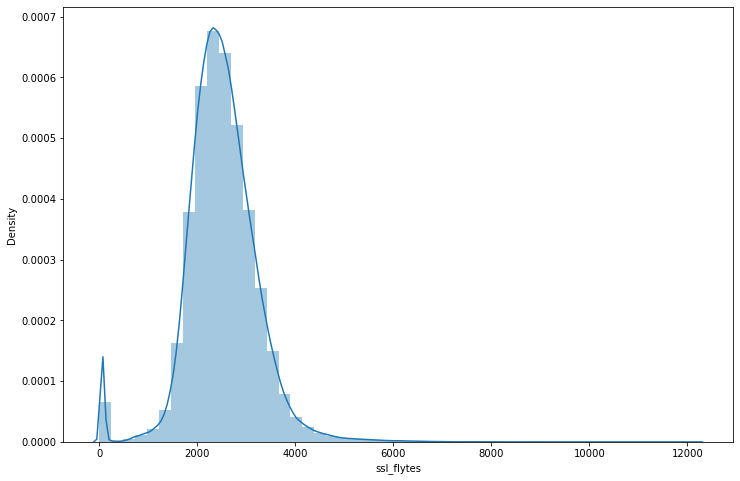

In [272]:
plt.figure(figsize = (12,8))
sns.distplot(df.ssl_flytes);

In [61]:
# removing outliers in ssl_flytes
lim=outlier_limits((df.ssl_flytes))
df.drop(df[(df.ssl_flytes>lim[1])].index,inplace=True)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


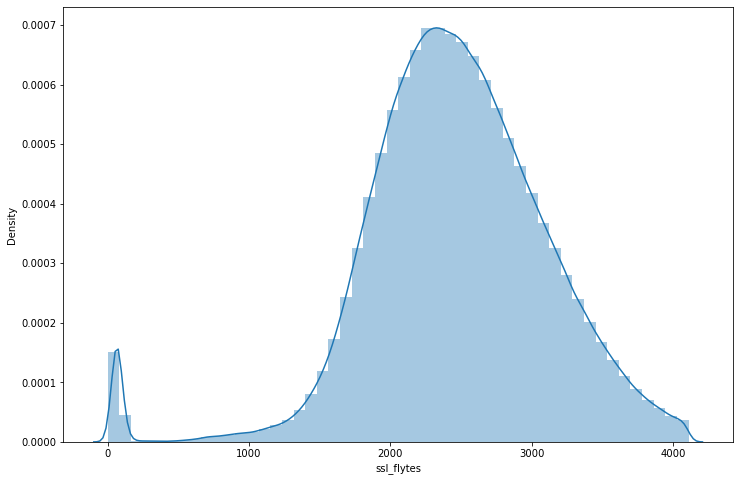

In [62]:
plt.figure(figsize = (12,8))
sns.distplot(df.ssl_flytes);

### Most of the values in ssl_flytes below 1000 are contributed by new_connections hence, retaining those values

In [295]:
df.cryptoserver_keysigning.value_counts(),df.new_connection.value_counts()

(0    2810655
 1      46177
 Name: cryptoserver_keysigning, dtype: int64,
 0    2810653
 1      46179
 Name: new_connection, dtype: int64)

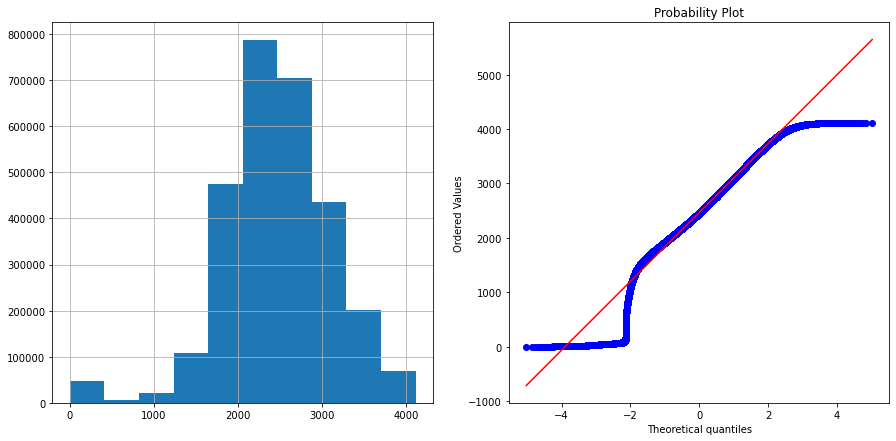

In [296]:
diagnostic_plot(df.ssl_flytes)

In [63]:
# removing outliers in mdt_application_usecs
lim=outlier_limits((df.mdt_application_usecs))
df.drop(df[(df.mdt_application_usecs>lim[1])|(df.mdt_application_usecs<lim[0])].index,inplace=True)

In [74]:
df.cryptoserver_keysigning.value_counts(),df.new_connection.value_counts()

(0    2801566
 1      46177
 Name: cryptoserver_keysigning, dtype: int64,
 0    2801564
 1      46179
 Name: new_connection, dtype: int64)

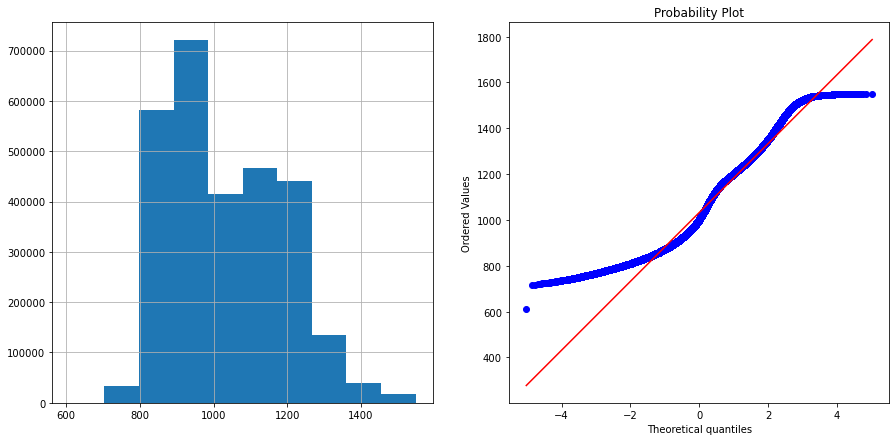

In [299]:
diagnostic_plot(df.mdt_application_usecs)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mdt_application_usecs'>

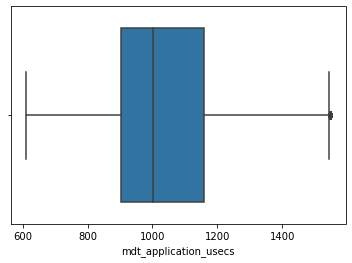

In [138]:
sns.boxplot(df.mdt_application_usecs)

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


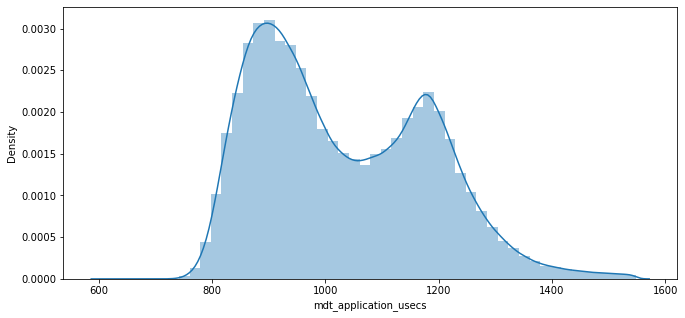

In [297]:
plt.figure(figsize = (11,5))
sns.distplot(df.mdt_application_usecs);

### Their is a clear bi-modality seen in feature "mdt_application_usecs".

### Observations on the bi-modality

In [300]:
# 1st peak
df[(df.mdt_application_usecs>870)&(df.mdt_application_usecs<930)].iloc[:,:-6].sample(100).head(40)

obj_size  bytes_served  uncompressed_length  new_connection  \
1434467     37283          1165                37283               0   
3114926      2148           529                 2148               0   
1421389      2118           530                 2118               0   
981330      36679          1173                36679               0   
2324388     36075          1165                36075               0   
2614766     36679          1173                36679               0   
1640647      2098           524                 2098               0   
1417754     37283          1165                37283               0   
1260797      2108           524                 2108               0   
2261375     36679          1168                36679               0   
2186258     36679          1168                36679               0   
3227809      2128           526                 2128               0   
2683703     36679          1173                36679               0   
2330927      2098           522                 2098               0   
1961673     36679          1173                36679               0   
2639740      2098           524                 2098               0   
2226199      2098           521                 2098               0   
995172       2108           524                 2108               0   
1718121     36679          1173                36679               0   
2569642     36075          1165                36075               0   
2153915      2108           526                 2108               0   
1697334     37283          1165                37283               0   
1073214      2098           525                 2098               0   
3082202     37283          1165                37283               1   
2866785     36679          1173                36679               0   
2072854      2098           525                 2098               0   
2004137      2138           528                 2138               0   
2670423     36075          1165                36075               0   
932582      36679          1168                36679               0   
1463833     37283          1165                37283               0   
1890361      2118           524                 2118               0   
1277380     36679          1173                36679               0   
1501058      2108           527                 2108               0   
2489083      2098           525                 2098               0   
2219012      2108           526                 2108               0   
1844060      2108           524                 2108               0   
1690198     36679          1168                36679               0   
1983841     36075          1165                36075               0   
793022       2108           528                 2108               0   
706212       2098           526                 2098               0   

         system_buffer  hoc  gzip_zip  gzip_unzip  synchronous_refresh  \
1434467              1    0         1           1                    0   
3114926              0    1         1           0                    0   
1421389              0    1         1           0                    0   
981330               0    1         1           1                    0   
2324388              1    0         1           1                    0   
2614766              0    1         1           1                    0   
1640647              0    1         1           0                    0   
1417754              0    1         1           1                    0   
1260797              1    0         1           0                    0   
2261375              1    0         1           1                    0   
2186258              0    1         1           1                    0   
3227809              0    1         1           0                    0   
2683703              0    1         1           1                    0   
2330927             

In [301]:
# 2nd peak
df[(df.mdt_application_usecs>1170)&(df.mdt_application_usecs<1220)].iloc[:,:-6].sample(100).head(40)

obj_size  bytes_served  uncompressed_length  new_connection  \
1000305     36679          1168                36679               0   
1495950      2138           531                 2138               0   
2441502     36075          1165                36075               0   
969084      36075          1165                36075               0   
1459419      2128           527                 2128               0   
2922668      2108           526                 2108               0   
2372864      2118           527                 2118               0   
1667710     36075          1165                36075               0   
663909      36679          1173                36679               0   
801035      36679          1168                36679               0   
2064708      2098           526                 2098               0   
2344854      2118           525                 2118               0   
2979271     37283          1165                37283               0   
913795       2128           529                 2128               0   
1426701      2098           525                 2098               0   
472467       5779           688                 5779               0   
2099059      2118           525                 2118               0   
1869012     36679          1173                36679               0   
2673073      2108           522                 2108               0   
326674       5833           691                 5833               0   
991247      36679          1168                36679               0   
2931768      2118           523                 2118               0   
1438956     37283          1165                37283               0   
1765408     36075          1165                36075               0   
1904821      2118           527                 2118               0   
1139679      2138           525                 2138               0   
1039151      2098           524                 2098               0   
1243720     36075          1165                36075               0   
1279982      2128           527                 2128               0   
1143641     36075          1165                36075               0   
1191993      2098           525                 2098               0   
2521470     36679          1168                36679               0   
2246434     36679          1168                36679               0   
436935       5833           691                 5833               0   
2958792     36679          1173                36679               0   
1896763     36679          1168                36679               0   
2092534     36679          1168                36679               0   
2358860     36075          1165                36075               0   
51852        5833           691                 5833               0   
2763030      2128           528                 2128               0   

         system_buffer  hoc  gzip_zip  gzip_unzip  synchronous_refresh  \
1000305              0    1         1           1                    0   
1495950              1    0         1           0                    0   
2441502              1    0         1           1                    0   
969084               0    1         1           1                    0   
1459419              1    0         1           0                    0   
2922668              1    0         1           0                    0   
2372864              0    1         1           0                    0   
1667710              0    1         1           1                    0   
663909               0    1         1           1                    0   
801035               1    0         1           1                    0   
2064708              1    0         1           0                    0   
2344854              1    0         1           0                    0   
2979271              1    0         1           1                    0   
913795              

In [302]:
# cpu_flytes
df[(df.mdt_application_usecs>870)&(df.mdt_application_usecs<930)].iloc[:,:-6].cpu_flytes.mean(),df[(df.mdt_application_usecs>1170)&(df.mdt_application_usecs<1220)].iloc[:,:-6].cpu_flytes.mean()

(32194.616262316278, 42320.96988504052)

In [303]:
# ssl_flytes
df[(df.mdt_application_usecs>870)&(df.mdt_application_usecs<930)].ssl_flytes.mean(),df[(df.mdt_application_usecs>1170)&(df.mdt_application_usecs<1220)].ssl_flytes.mean()

(2195.375228882227, 2768.130979350846)

In [304]:
# phtm_usecs
df[(df.mdt_application_usecs>870)&(df.mdt_application_usecs<930)].phtm_usecs.mean(),df[(df.mdt_application_usecs>1170)&(df.mdt_application_usecs<1220)].phtm_usecs.mean()

(1445.2494831055844, 1842.0722351594084)

In [305]:
#obj_size
df[(df.mdt_application_usecs>870)&(df.mdt_application_usecs<930)].iloc[:,:-6].obj_size.mean(),df[(df.mdt_application_usecs>1170)&(df.mdt_application_usecs<1220)].iloc[:,:-6].obj_size.mean()

(18950.571548239208, 16432.48684446224)

### So in bimodality their is large difference in the flytes but the obj_size is still almost the same.

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


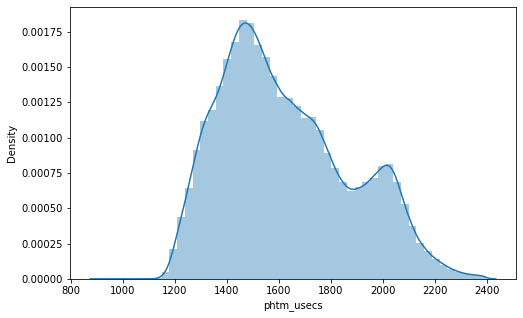

In [305]:
plt.figure(figsize = (8,5))
sns.distplot(df.phtm_usecs);

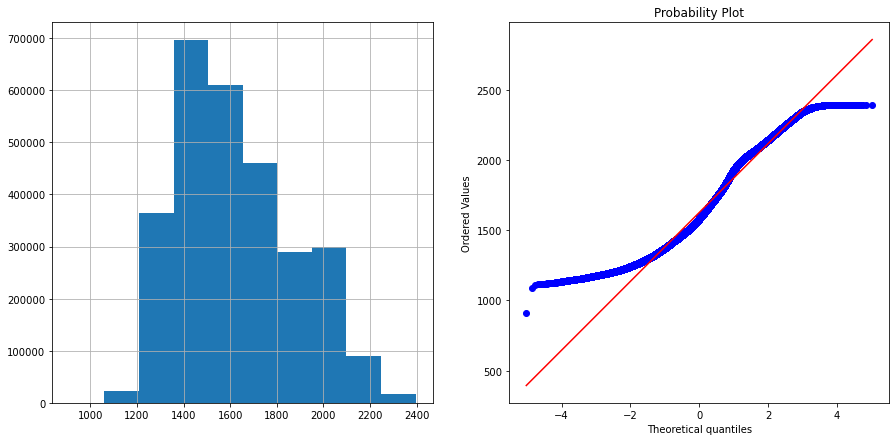

In [308]:
diagnostic_plot(df.phtm_usecs)

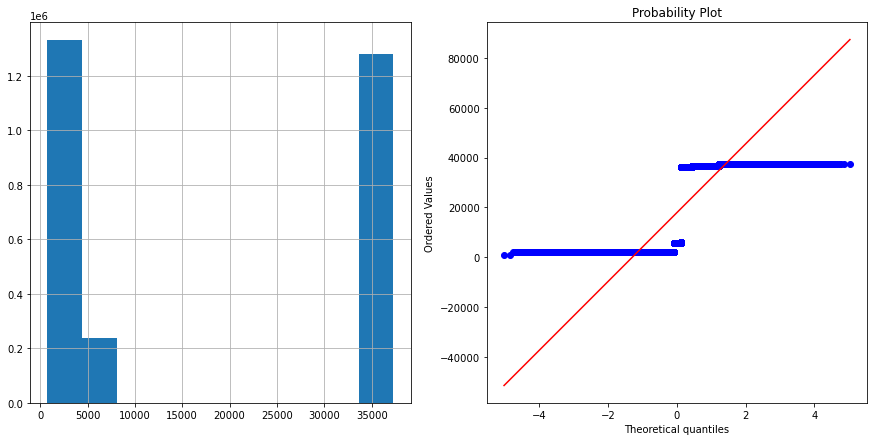

In [309]:
diagnostic_plot(df.obj_size)

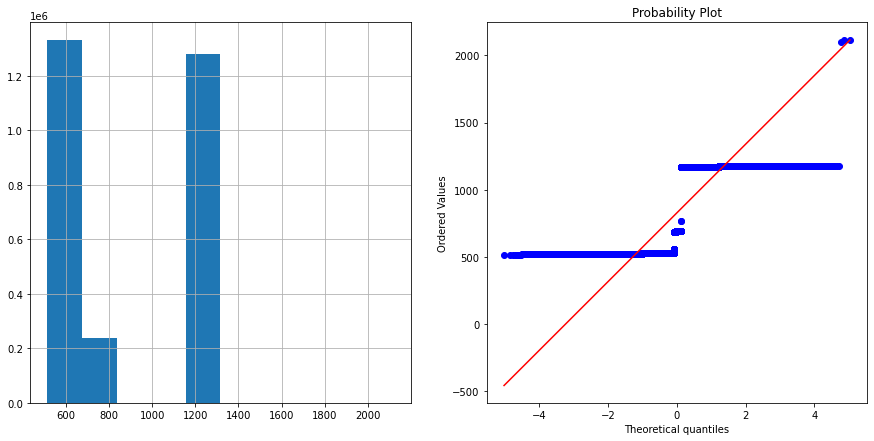

In [310]:
diagnostic_plot(df.bytes_served)

In [306]:
df.head()

obj_size  bytes_served  uncompressed_length  new_connection  system_buffer  \
1      5833           690                 5833               0              0   
5      5833           690                 5833               0              1   
6      5833           690                 5833               0              0   
7      5833           690                 5833               0              0   
8      5833           690                 5833               0              0   

   hoc  gzip_zip  gzip_unzip  synchronous_refresh  parent_hit  ...  ssl_usecs  \
1    1         1           1                    0           0  ...          0   
5    0         1           1                    0           0  ...          0   
6    1         1           1                    0           0  ...          0   
7    1         1           1                    0           0  ...          0   
8    1         1           1                    0           0  ...          0   

   gzu_usecs  gzc_usecs  cpu_flytes  disk_flytes  ssl_flytes  \
1         12         96      127493            0        3703   
5         14         78       52372            0        1559   
6         17        110       66858            0        2234   
7         16        111       79559            0        2700   
8         11         90       73293            0        1891   

   mdt_application_usecs  cp_code_310851  cp_code_937717  log_cpu_flytes  
1                   1258               1               0       11.755817  
5                    922               1               0       10.866127  
6                   1247               1               0       11.110326  
7                   1463               1               0       11.284254  
8                   1248               1               0       11.202220  

[5 rows x 33 columns]

In [307]:
df.cryptoserver_keysigning.value_counts(),df.new_connection.value_counts()

(0    2801566
 1      46177
 Name: cryptoserver_keysigning, dtype: int64,
 0    2801564
 1      46179
 Name: new_connection, dtype: int64)

In [64]:
# Dropping cp_code as it is having a direct correlation with the live_stream and not contributing with the model
df.drop(['cp_code_937717','cp_code_310851'],axis=1,inplace=True)

In [309]:
df.corr()

obj_size  bytes_served  uncompressed_length  \
obj_size                    1.000000      0.996317             1.000000   
bytes_served                0.996317      1.000000             0.996317   
uncompressed_length         1.000000      0.996317             1.000000   
new_connection              0.054691      0.061619             0.054690   
system_buffer               0.053191      0.042812             0.053192   
hoc                        -0.053191     -0.042812            -0.053192   
gzip_zip                    0.001395     -0.002674             0.001486   
gzip_unzip                  0.874743      0.912196             0.874743   
synchronous_refresh        -0.008553     -0.005316            -0.008553   
parent_hit                 -0.006020     -0.003734            -0.006020   
icp_peer_hit                     NaN           NaN                  NaN   
prefetching_trigger        -0.005931     -0.003680            -0.005931   
session_ticket                   NaN           NaN                  NaN   
cryptoserver_keysigning     0.054698      0.061622             0.054697   
sni                         0.000850      0.000162             0.000850   
live_stream                -0.218704     -0.136723            -0.218704   
ssl                         0.000850      0.000162             0.000850   
ssl_encryption_aes_256_gcm  0.000850      0.000162             0.000850   
ssl_keysigning_ecdsa        0.054698      0.061622             0.054697   
ssl_encryption_aes_128_gcm       NaN           NaN                  NaN   
cca_bbr                          NaN           NaN                  NaN   
ocl                         1.000000      0.996317             1.000000   
phtm_usecs                  0.348069      0.372407             0.348069   
ssl_usecs                   0.060882      0.065825             0.060881   
gzu_usecs                   0.887825      0.913192             0.887825   
gzc_usecs                   0.978827      0.975773             0.978827   
cpu_flytes                  0.032315      0.100676             0.032315   
disk_flytes                      NaN           NaN                  NaN   
ssl_flytes                  0.264263      0.267222             0.264264   
mdt_application_usecs      -0.247158     -0.226172            -0.247158   
log_cpu_flytes              0.100136      0.163328             0.100136   

                            new_connection  system_buffer       hoc  gzip_zip  \
obj_size                          0.054691       0.053191 -0.053191  0.001395   
bytes_served                      0.061619       0.042812 -0.042812 -0.002674   
uncompressed_length               0.054690       0.053192 -0.053192  0.001486   
new_connection                    1.000000      -0.014037  0.014037 -0.009390   
system_buffer                    -0.014037       1.000000 -1.000000  0.000178   
hoc                               0.014037      -1.000000  1.000000 -0.000178   
gzip_zip                         -0.009390       0.000178 -0.000178  1.000000   
gzip_unzip                        0.085333      -0.012270  0.012270  0.000581   
synchronous_refresh               0.000800       0.007999 -0.007999  0.000017   
parent_hit                       -0.001079       0.007696 -0.007696  0.000012   
icp_peer_hit                           NaN            NaN       NaN       NaN   
prefetching_trigger              -0.001062       0.007758 -0.007758  0.000012   
session_ticket                         NaN            NaN       NaN       NaN   
cryptoserver_keysigning           0.999978      -0.014039  0.014039 -0.005560   
sni                              -0.006527      -0.000183  0.000183  0.577350   
live_stream                       0.087409      -0.130768  0.130768  0.000442   
ssl                              -0.006527      -0.000183  0.000183  0.577350   
ssl_encryption_aes_256_gcm       -0.006527      -0.000183  0.000183  0.577350   
ssl_keysigning_ecdsa              0.999978      -0.014039  0.014039 -0.005560   
ssl_enc

In [310]:
## for dataset log1
for i in df.columns:
    print(df[i].value_counts())

36679    639615
2108     466325
2118     329628
36075    321940
37283    317910
2098     316446
2128     149714
5833     119386
5779     115693
2138      49281
2148      12609
2158       2503
5887       1974
5941       1755
2144        916
2134        774
2154        486
2168        439
2164        193
2178         65
2174         65
2184         11
2188          9
2194          3
768           2
2198          1
Name: obj_size, dtype: int64
1165    639850
1168    320618
1173    318997
525     253187
526     250368
524     203728
527     193556
523     129369
690     117299
528     116157
522      64642
688      59677
691      58103
529      53994
521      25840
530      19302
520       7950
531       5245
519       2006
694       1755
532       1005
695        988
693        986
554        488
553        474
518        429
552        374
555        371
551        260
556        202
533        152
550        122
557         67
517         61
549         47
558         24
534         17


/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWa

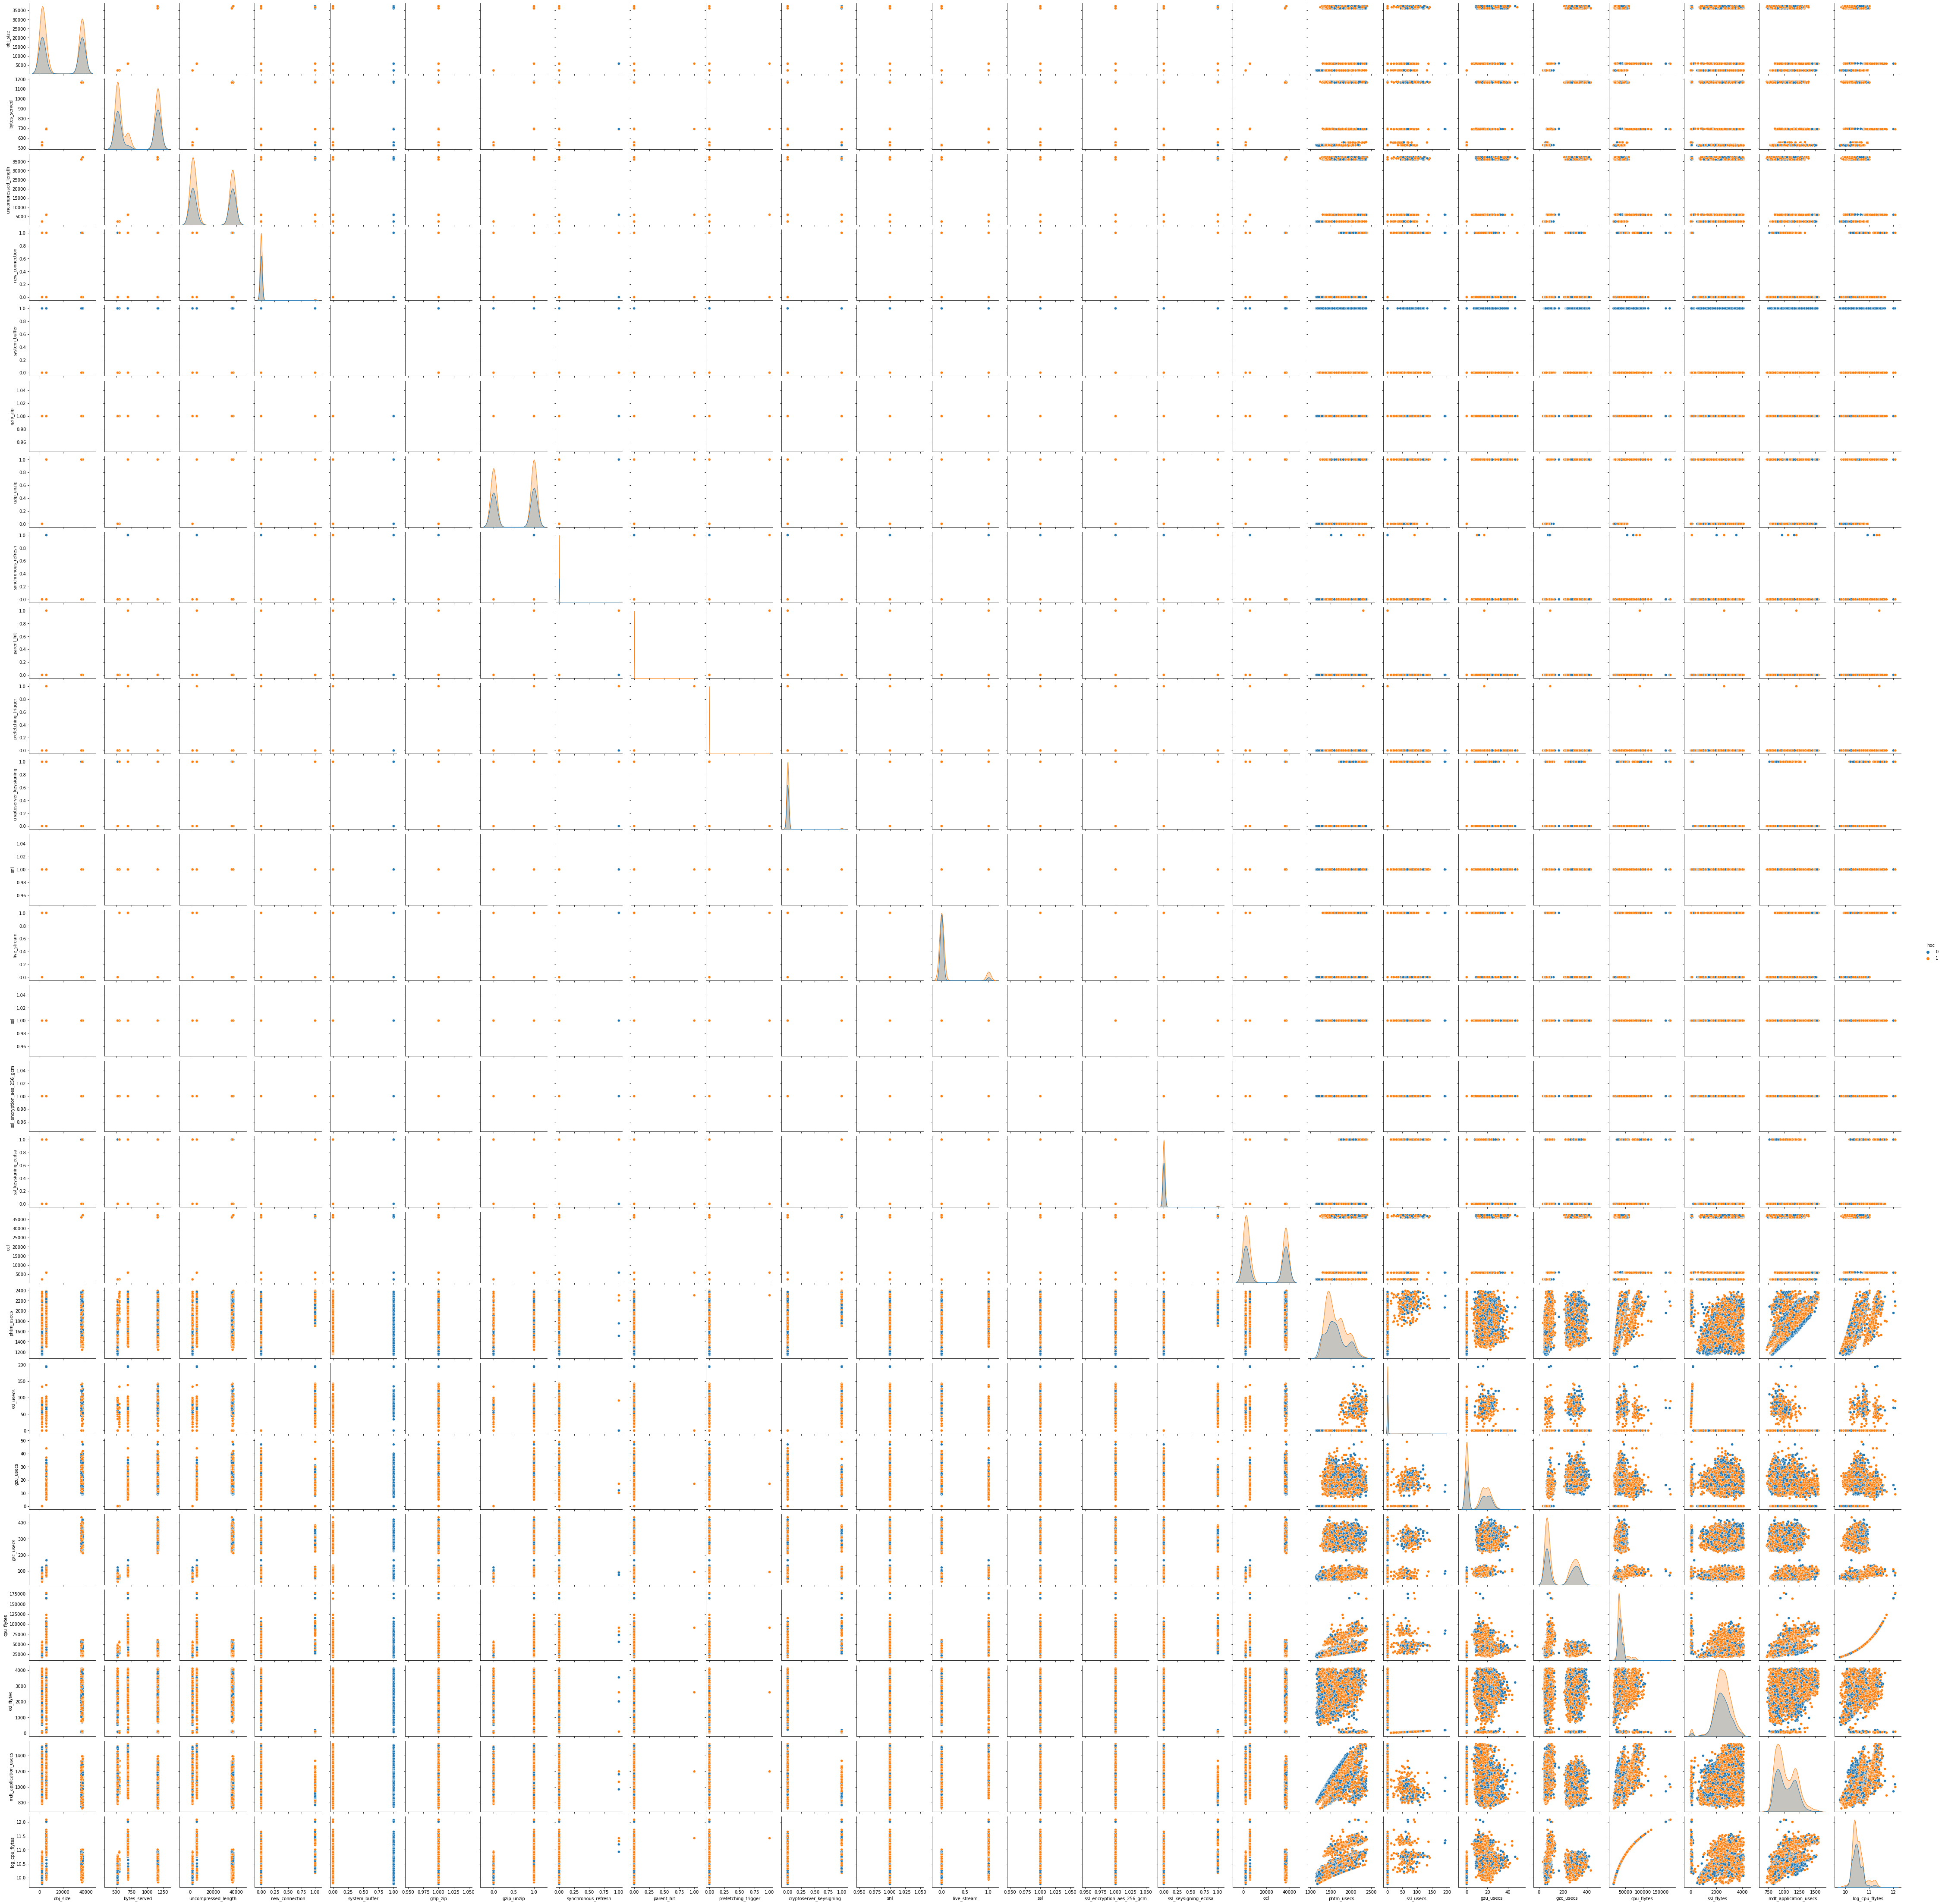

In [317]:
sns.pairplot(df.drop(["icp_peer_hit","session_ticket","ssl_encryption_aes_128_gcm","cca_bbr","disk_flytes"],axis=1).sample(20000),hue="hoc")

<AxesSubplot:>

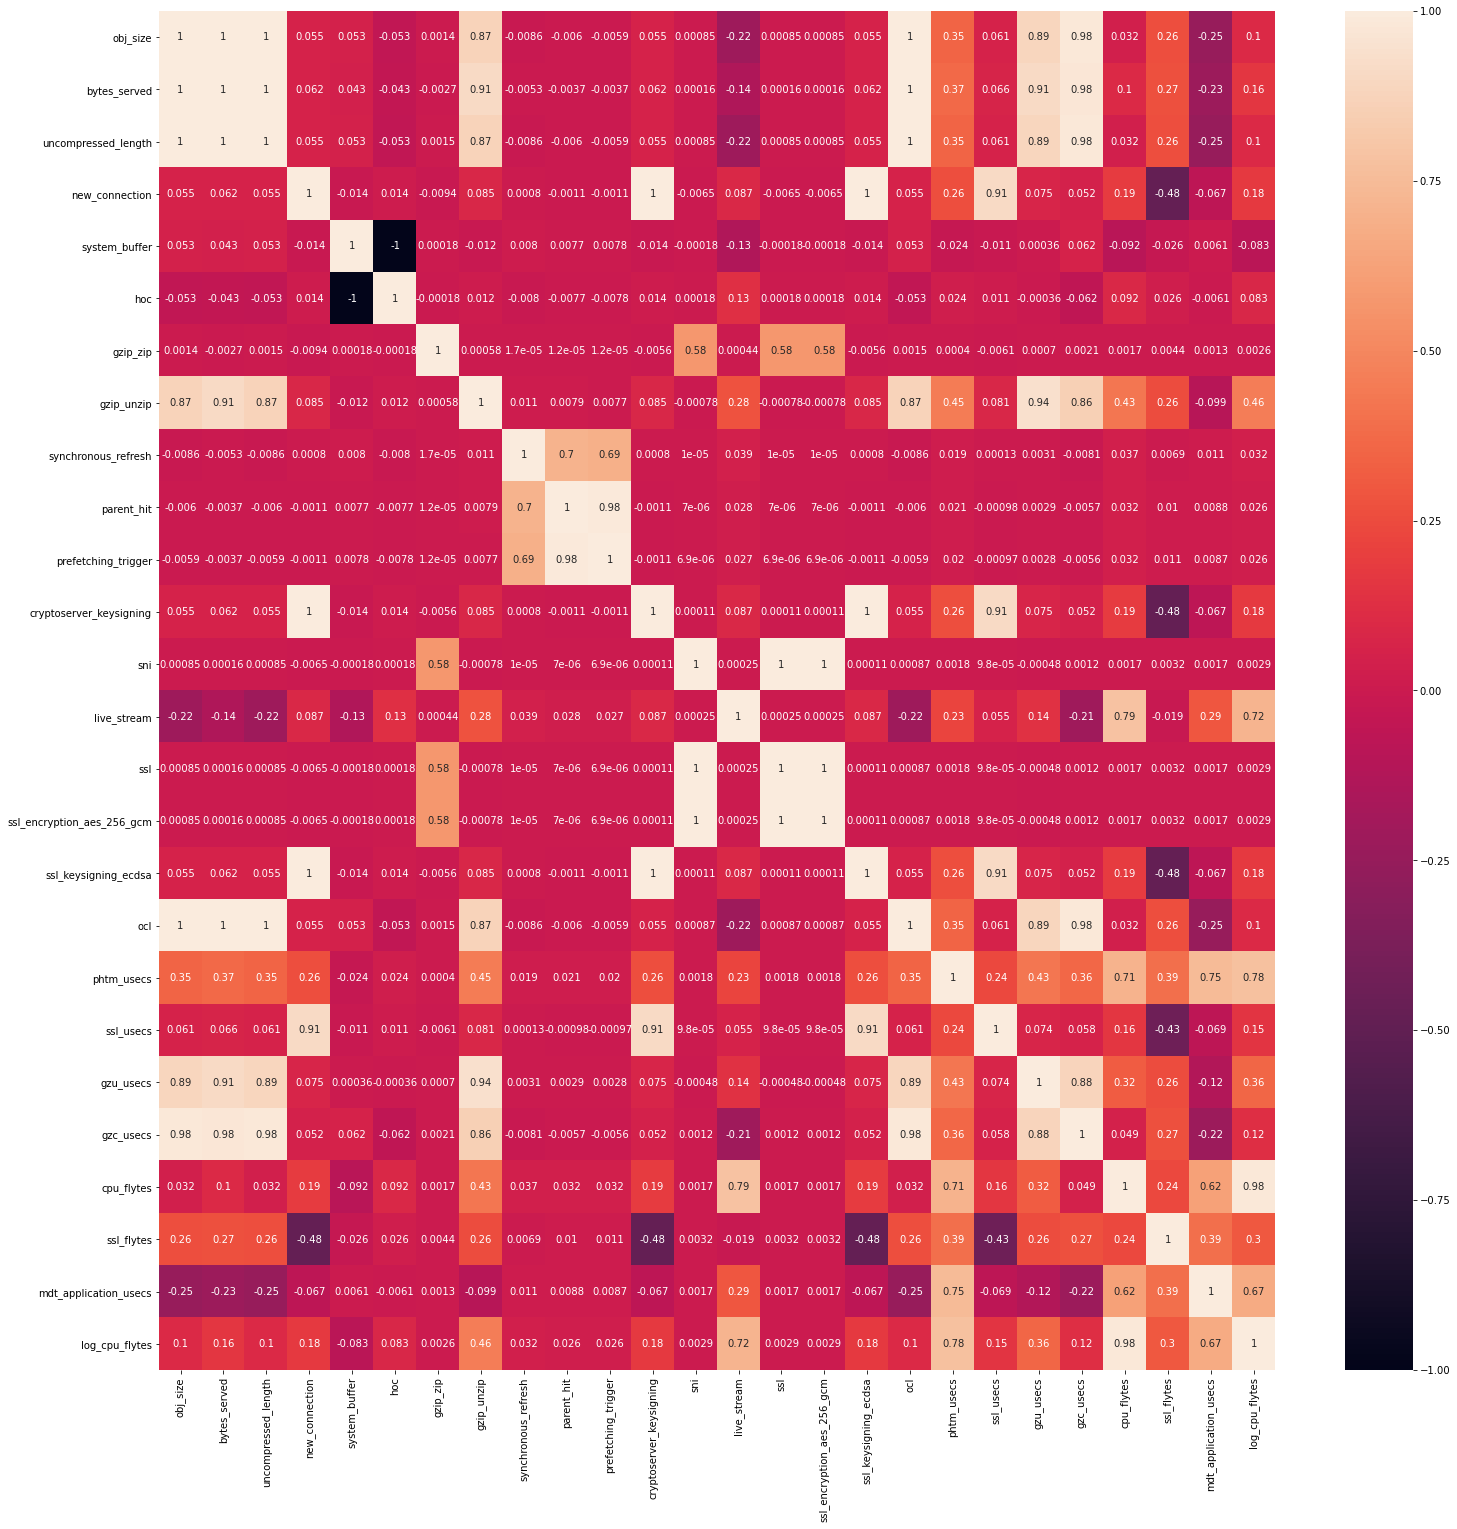

In [311]:
plt.figure(figsize = (25,25))
sns.heatmap(df.drop(["icp_peer_hit","session_ticket","ssl_encryption_aes_128_gcm","cca_bbr","disk_flytes"],axis=1).corr(),annot=True)

### Correlation between features are observed but actual correlations will be observed only after its multiplication with obj_size or other features and then check the correlation plot.

In [312]:
df.columns

Index(['obj_size', 'bytes_served', 'uncompressed_length', 'new_connection',
       'system_buffer', 'hoc', 'gzip_zip', 'gzip_unzip', 'synchronous_refresh',
       'parent_hit', 'icp_peer_hit', 'prefetching_trigger', 'session_ticket',
       'cryptoserver_keysigning', 'sni', 'live_stream', 'ssl',
       'ssl_encryption_aes_256_gcm', 'ssl_keysigning_ecdsa',
       'ssl_encryption_aes_128_gcm', 'cca_bbr', 'ocl', 'phtm_usecs',
       'ssl_usecs', 'gzu_usecs', 'gzc_usecs', 'cpu_flytes', 'disk_flytes',
       'ssl_flytes', 'mdt_application_usecs', 'log_cpu_flytes'],
      dtype='object')

In [65]:
def processing_data(gal_data):
    # gzip
    if 'gzip_zip' in gal_data.columns:
        gal_data['gzip_zip'] = gal_data['gzip_zip'] * gal_data['uncompressed_length']

    if 'live_stream' in gal_data.columns:
        gal_data['live_stream'] = gal_data['live_stream'] * gal_data['obj_size']

    if 'gzip_unzip' in gal_data.columns:
        if 'ocl' in gal_data.columns and  gal_data['ocl'].isnull().sum() == 0:
            gal_data['gzip_unzip'] = gal_data['gzip_unzip'] * gal_data['ocl']
        else:
            #temp
            print("Using approximation for compressed length for gzip unzipping")
            if 'gzip_unzip' in gal_data.columns:
                gal_data['gzip_unzip'] = gal_data['gzip_unzip'] * 0.5 * gal_data['obj_size']

    # TODO: Replace all if checks with try-except - might be computationally faster that if-in
    #       But code might look uglier.

    if any(column in gal_data.columns for column in ['cca_fast', 'cca_reno']):
        try: gal_data['cca_fast'] = gal_data['cca_fast'] * gal_data['bytes_served']
        except: pass
        try: gal_data['cca_reno'] = gal_data['cca_reno'] * gal_data['bytes_served']
        except: pass
    if 'cca_bbr' in gal_data.columns:
        gal_data['cca_bbr'] = gal_data['cca_bbr'] * gal_data['bytes_served']

    # For legacy purposes - these columns have been renamed
    if any(column in gal_data.columns for column in ['iphone_http_stremaing', 'hd_streaming']):
        gal_data = gal_data.drop(['iphone_http_stremaing'], axis=1) 
        gal_data = gal_data.rename(index=str, columns={'hd_streaming': 'muxed_http_streaming_fixed'})
        gal_data['muxed_http_streaming_relative'] = gal_data['muxed_http_streaming_fixed'] * gal_data['obj_size']

    if 'hls_streaming_uss' in gal_data.columns:
        gal_data['hls_streaming_uss'] = gal_data['hls_streaming_uss'] * gal_data['obj_size']

    if 'streaming_audio' in gal_data.columns:
        gal_data['streaming_audio'] = gal_data['streaming_audio'] * gal_data['obj_size']

    gal_data['_bytes_served'] = gal_data['bytes_served']
    #
    for column in gal_data.columns:
        if column.startswith("ssl_encryption"):
            gal_data[column] = gal_data[column] * gal_data['_bytes_served']    
 
    # Set mido to be 0 or object size
    try: gal_data['hoc'] = gal_data['hoc'] * gal_data['_bytes_served']
    except: pass
    try: gal_data['system_buffer'] = gal_data['system_buffer'] * gal_data['_bytes_served']
    except: pass
    try: gal_data['disk'] = gal_data['disk'] * gal_data['_bytes_served']
    except: pass
  
    try: gal_data['metrocache_parent_hit'] *= gal_data['_bytes_served']
    except: pass

    try: gal_data['origin_hit'] = gal_data['origin_hit'] * gal_data['_bytes_served']
    except: pass
    try: gal_data['parent_hit'] = gal_data['parent_hit'] * gal_data['_bytes_served']
    except: pass
    try: gal_data['icp_peer_hit'] = gal_data['icp_peer_hit'] * gal_data['_bytes_served']
    except: pass   

    for column in gal_data.columns:
        if column.endswith("poc_prefetch"):
            gal_data[column] = gal_data[column] * gal_data['_bytes_served']    
            display(gal_data[column].value_counts())

    try:
        gal_data['hls_streaming_uss'] *= gal_data['obj_size']
    except: pass

    if 'prefetching_done' in gal_data.columns:
        gal_data['prefetching_done'] *= gal_data['obj_size']

#     # obj_size set to poc_frag_read_size above
#     try: gal_data['poc_fragment'] *= gal_data['obj_size']
#     except: pass

    try: gal_data['http2_stream'] = gal_data['http2_stream'] ^ gal_data['http2_connection']
    except: pass

    try:
        gal_data['http2_connection'] = gal_data['http2_connection'] & gal_data['tcp_connection']
        gal_data['tcp_connection'] = gal_data['http2_connection'] ^ gal_data['tcp_connection']
    except: pass   
    
    # Drop rows which have object size 0
#     gal_data.drop( gal_data[ gal_data['obj_size'] <= 0 ].index , inplace=True)
    # Drop rows which have cpu flytes 0 (this is due to a bug in ghost (CR 4478496)
    zero_cpu_flytes_count = gal_data.query('cpu_flytes == 0').shape[0]
    if zero_cpu_flytes_count > 0: 
        ic(f"Found {zero_cpu_flytes_count} rows with 0 CPU flytes! Removing...")
        gal_data.drop( gal_data[ gal_data['cpu_flytes'] <= 0 ].index , inplace=True)


#     print(gal_data.shape)
    # Some rows have bytes served as 0. Drop them until investigating why this is seen
    gal_data.drop( gal_data[ (gal_data['bytes_served'] <= 0) ].index , inplace=True)
    gal_data.drop( gal_data[ (gal_data['obj_size'] <= 0) ].index , inplace=True)


In [66]:
processing_data(df)

In [67]:
df.iloc[:,12:].head()

session_ticket  cryptoserver_keysigning  sni  live_stream  ssl  \
1               0                        0    1         5833    1   
5               0                        0    1         5833    1   
6               0                        0    1         5833    1   
7               0                        0    1         5833    1   
8               0                        0    1         5833    1   

   ssl_encryption_aes_256_gcm  ssl_keysigning_ecdsa  \
1                         690                     0   
5                         690                     0   
6                         690                     0   
7                         690                     0   
8                         690                     0   

   ssl_encryption_aes_128_gcm  cca_bbr   ocl  phtm_usecs  ssl_usecs  \
1                         0.0      690  5833        1909          0   
5                         0.0      690  5833        1468          0   
6                         0.0      690  5833        1874          0   
7                         0.0      690  5833        2230          0   
8                         0.0      690  5833        1860          0   

   gzu_usecs  gzc_usecs  cpu_flytes  disk_flytes  ssl_flytes  \
1         12         96      127493            0        3703   
5         14         78       52372            0        1559   
6         17        110       66858            0        2234   
7         16        111       79559            0        2700   
8         11         90       73293            0        1891   

   mdt_application_usecs  log_cpu_flytes  _bytes_served  
1                   1258       11.755817            690  
5                    922       10.866127            690  
6                   1247       11.110326            690  
7                   1463       11.284254            690  
8                   1248       11.202220            690

In [79]:
df.disk_flytes.value_counts(),df.ssl.value_counts(),df.ssl_encryption_aes_128_gcm.value_counts()

(0    2847743
 Name: disk_flytes, dtype: int64,
 1    2847741
 0          2
 Name: ssl, dtype: int64,
 0.0    2847743
 Name: ssl_encryption_aes_128_gcm, dtype: int64)

### Dropping features ["_bytes_served","disk_flytes","ssl","ssl_encryption_aes_128_gcm"] as are almost zero will not have suitable coeffients in the model.

In [68]:
df.drop(["_bytes_served","disk_flytes","ssl","ssl_encryption_aes_128_gcm"],axis=1,inplace=True)

In [69]:
data_structure=df.copy()

In [70]:
df.head()

obj_size  bytes_served  uncompressed_length  new_connection  system_buffer  \
1      5833           690                 5833               0              0   
5      5833           690                 5833               0            690   
6      5833           690                 5833               0              0   
7      5833           690                 5833               0              0   
8      5833           690                 5833               0              0   

   hoc  gzip_zip  gzip_unzip  synchronous_refresh  parent_hit  ...  cca_bbr  \
1  690      5833        5833                    0           0  ...      690   
5    0      5833        5833                    0           0  ...      690   
6  690      5833        5833                    0           0  ...      690   
7  690      5833        5833                    0           0  ...      690   
8  690      5833        5833                    0           0  ...      690   

    ocl  phtm_usecs  ssl_usecs  gzu_usecs  gzc_usecs  cpu_flytes  ssl_flytes  \
1  5833        1909          0         12         96      127493        3703   
5  5833        1468          0         14         78       52372        1559   
6  5833        1874          0         17        110       66858        2234   
7  5833        2230          0         16        111       79559        2700   
8  5833        1860          0         11         90       73293        1891   

   mdt_application_usecs  log_cpu_flytes  
1                   1258       11.755817  
5                    922       10.866127  
6                   1247       11.110326  
7                   1463       11.284254  
8                   1248       11.202220  

[5 rows x 28 columns]

In [71]:
## Combine Correlated Featrures ##

def _combine5(gal_data, base_column, correlated_columns, combined_column_names, col_type):
    ''' Proper way to do an intersection. Code is a bit clumsy '''
    new_col_name =  base_column + '_' + '_'.join(correlated_columns)
    if col_type == "discrete":
        for corr_col in correlated_columns:
            print(f"Combining {base_column} and {corr_col}")
            gal_data[new_col_name] = gal_data[base_column] & gal_data[corr_col]

            gal_data[base_column] ^= gal_data[new_col_name]
            gal_data[corr_col] ^= gal_data[new_col_name]

    if col_type == "continuous":
        for corr_col in correlated_columns:
            print(f"Combining {base_column} and {corr_col}")
            intersection = ((gal_data[base_column] > 0) & (gal_data[corr_col] > 0)).astype(int)
            gal_data[new_col_name] = pd.concat((gal_data[base_column], gal_data[corr_col]), axis=1).max(axis=1)
            gal_data[new_col_name] *= intersection
            
            gal_data[base_column] *= (intersection ^ 1)    
            gal_data[corr_col] *= (intersection ^ 1)

            
#     gal_data.drop( gal_data[ gal_data[corr_col] != 0 ].index , inplace=True, errors='ignore')
#     gal_data.drop([corr_col], axis=1, inplace=True, errors='ignore')


def combine_correlated_features5(gal_data, corr_pairs):
    ''' Combines correlated features as union. 
    '''
    combined_column_names = {}
    columns_to_drop = set([])
    col_type = ""

    for key, value in corr_pairs:
#         max_values = [gal_data[clm].max() for clm in value]
        max_values = gal_data[value].max()

        if gal_data[key].max() == 1 and max_values == 1: # For features with discrete values
            col_type = "discrete"
        if gal_data[key].max() > 1 and max_values > 1: # For features with continious values
            col_type = "continuous"

        new_col_name =  key + '_' + value

        _combine5(gal_data, key, [value], combined_column_names, col_type)

def _combine4(gal_data, base_column, correlated_columns, combined_column_names, columns_to_drop, col_type):
    ''' Proper way to do an intersection. Code is a bit clumsy '''
    new_col_name =  base_column
    prev_combined_name = base_column
    for corr_col in correlated_columns:

        if combined_column_names:
            prev_combined = [key for key, val in combined_column_names.items() if base_column in key]
            if prev_combined:
                prev_combined_name = prev_combined[0]
                combined_column_names.pop(prev_combined_name, None)

        if corr_col not in prev_combined_name:
            print(f"Combining {prev_combined_name} and {corr_col}")
            
            new_col_name = prev_combined_name
            new_col_name += '_' + corr_col     
            print("Combined column: ", new_col_name)
            combined_column_names[new_col_name] = 1
            
            if col_type == "discrete":
#                     print()
#                     print("*** ", new_col_name, "; base_column= ", base_column, "; corr_col= ", corr_col, "; prev_combined_name= ", prev_combined_name)
#                     print()
                    gal_data[new_col_name] = gal_data[prev_combined_name] & gal_data[corr_col]

                    gal_data[prev_combined_name] ^= gal_data[new_col_name]
                    gal_data[corr_col] ^= gal_data[new_col_name]

            if col_type == "continuous":
#                     print()
#                     print("*** ", new_col_name, "; base_column= ", base_column, "; corr_col= ", corr_col, "; prev_combined_name= ", prev_combined_name)
#                     print()
                    intersection = ((gal_data[prev_combined_name] > 0) & (gal_data[corr_col] > 0)).astype(int)
                    gal_data[new_col_name] = pd.concat((gal_data[prev_combined_name], gal_data[corr_col]), axis=1).mean(axis=1)
                    gal_data[new_col_name] *= intersection

                    gal_data[prev_combined_name] *= (intersection ^ 1)    
                    gal_data[corr_col] *= (intersection ^ 1)

def combine_correlated_features4(gal_data, corr_dict):
    ''' Combines correlated features as union. 
    '''
    combined_column_names = {}
    columns_to_drop = set([])
    col_type = ""

    for key, value in corr_dict.items():
        max_values = [gal_data[clm].max() for clm in value]

        if gal_data[key].max() == 1 and all(x == 1 for x in max_values): # For features with discrete values
            col_type = "discrete"
        if gal_data[key].max() > 1 and all(x > 1 for x in max_values): # For features with continious values
            col_type = "continuous"

        new_col_name =  key + '_' + '_'.join(value)

        _combine4(gal_data, key, value, combined_column_names, columns_to_drop, col_type)

def _combine3(gal_data, base_column, correlated_columns, combined_column_names, columns_to_drop, col_type):
    ''' Proper way to do a union. Code is a bit clumsy '''
    new_col_name =  base_column
    prev_combined_name = base_column
    for corr_col in correlated_columns:

        if combined_column_names:
            prev_combined = [key for key, val in combined_column_names.items() if base_column in key]
            if prev_combined:
                prev_combined_name = prev_combined[0]
                combined_column_names.pop(prev_combined_name, None)

        if corr_col not in prev_combined_name:
            print(f"Combining {prev_combined_name} and {corr_col}")
            
            new_col_name = prev_combined_name
            new_col_name += '_' + corr_col     
            print("Combined column: ", new_col_name)
            combined_column_names[new_col_name] = 1
            
            if col_type == "discrete":
                gal_data[new_col_name] = gal_data[prev_combined_name]
#                 gal_data[new_col_name] |= gal_data[corr_col]
                gal_data[new_col_name] &= gal_data[corr_col]

                gal_data[base_column] ^= gal_data[new_col_name]
                gal_data[corr_col] ^= gal_data[new_col_name]

            if col_type == "continuous":
                gal_data[new_col_name] = gal_data[prev_combined_name]
                gal_data[new_col_name] = pd.concat((gal_data[new_col_name], gal_data[corr_col]), axis=1).mean(axis=1)   
            
            columns_to_drop.add(prev_combined_name)
            columns_to_drop.add(base_column)
            columns_to_drop.add(corr_col)            


def combine_correlated_features_union3(gal_data, corr_dict):
    ''' Combines correlated features as union. 
    '''
    combined_column_names = {}
    columns_to_drop = set([])
    col_type = ""

    for key, value in corr_dict.items():
        max_values = [gal_data[clm].max() for clm in value]

        if gal_data[key].max() == 1 and all(x == 1 for x in max_values): # For features with discrete values
            col_type = "discrete"
        if gal_data[key].max() > 1 and all(x > 1 for x in max_values): # For features with continious values
            col_type = "continuous"

        new_col_name =  key + '_' + '_'.join(value)

        _combine3(gal_data, key, value, combined_column_names, columns_to_drop, col_type)

    print("Dropping:", list(columns_to_drop))
    gal_data.drop(list(columns_to_drop), axis=1, inplace=True, errors='ignore')
           
def _combine2(gal_data, base_column, correlated_columns, col_type):
    new_col_name =  base_column + '_' + '_'.join(correlated_columns)
    if col_type == "discrete":
        for corr_col in correlated_columns:
            print(f"Combining {base_column} and {corr_col}")
            gal_data[new_col_name] = gal_data[base_column] & gal_data[corr_col]

            gal_data[base_column] ^= gal_data[new_col_name]
            gal_data[corr_col] ^= gal_data[new_col_name]

    if col_type == "continuous":
        for corr_col in correlated_columns:
            print(f"Combining {base_column} and {corr_col}")
            intersection = ((gal_data[base_column] > 0) & (gal_data[corr_col] > 0)).astype(int)
            gal_data[new_col_name] = pd.concat((gal_data[base_column], gal_data[corr_col]), axis=1).mean(axis=1)
            gal_data[new_col_name] *= intersection
            
            gal_data[base_column] *= (intersection ^ 1)    
            gal_data[corr_col] *= (intersection ^ 1)


def combine_correlated_features2(gal_data, corr_dict):
    ''' Combines only intersection of the correlated features. 
        Does not drop features.
    '''
    combined_column_names = []
    columns_to_drop = set([])
    col_type = ""

    for key, value in corr_dict.items():
        max_values = [gal_data[clm].max() for clm in value]

        if gal_data[key].max() == 1 and all(x == 1 for x in max_values): # For features with discrete values
            col_type = "discrete"
        if gal_data[key].max() > 1 and all(x > 1 for x in max_values): # For features with continious values
            col_type = "continuous"

        new_col_name =  key + '_' + '_'.join(value)
        if any(new_col_name in n for n in combined_column_names):
            print(f"Features in {new_col_name} already combined.")
            continue

        combined_column_names.append(new_col_name)
        _combine2(gal_data, key, value, col_type)
#         gal_data = gal_data.loc[:, (gal_data != 0).any(axis=0)]   

def _combine(gal_data, columns_to_drop, new_col_name, correlated_col_name, col_type):
    if col_type == "discrete":
        for val in gal_data[correlated_col_name]:
            gal_data[new_col_name] |= gal_data[val]
            columns_to_drop.add(val)     
    
    if col_type == "continuous":
        for val in gal_data[correlated_col_name]:
            gal_data[new_col_name] = pd.concat((gal_data[new_col_name], gal_data[val]), axis=1).mean(axis=1)
            columns_to_drop.add(val) 

def combine_correlated_features(gal_data, corr_dict):
    combined_column_names = []
    columns_to_drop = set([])
    col_type = ""

    for key, value in corr_dict.items():
        max_values = [gal_data[clm].max() for clm in value]

        if gal_data[key].max() == 1 and all(x == 1 for x in max_values): # For features with discrete values
            col_type = "discrete"
        if gal_data[key].max() > 1 and all(x > 1 for x in max_values): # For features with continious values
            col_type = "continuous"

        columns_to_drop.add(key)
        new_col_name =  key + '_' + '_'.join(value)

        if any(new_col_name in n for n in combined_column_names):
            print(f"Features in {new_col_name} already combined. Dropping {key} instead.")
            columns_to_drop.add(key)
            continue

        print("New combined variable:", new_col_name)
        combined_column_names.append(new_col_name)
        gal_data[new_col_name] = gal_data[key] 

        
        _combine(gal_data, columns_to_drop, new_col_name, value, col_type)
        combined_column_names.append(key)

    print("Dropping:", list(columns_to_drop))
    gal_data.drop(list(columns_to_drop), axis=1, inplace=True)

<AxesSubplot:>

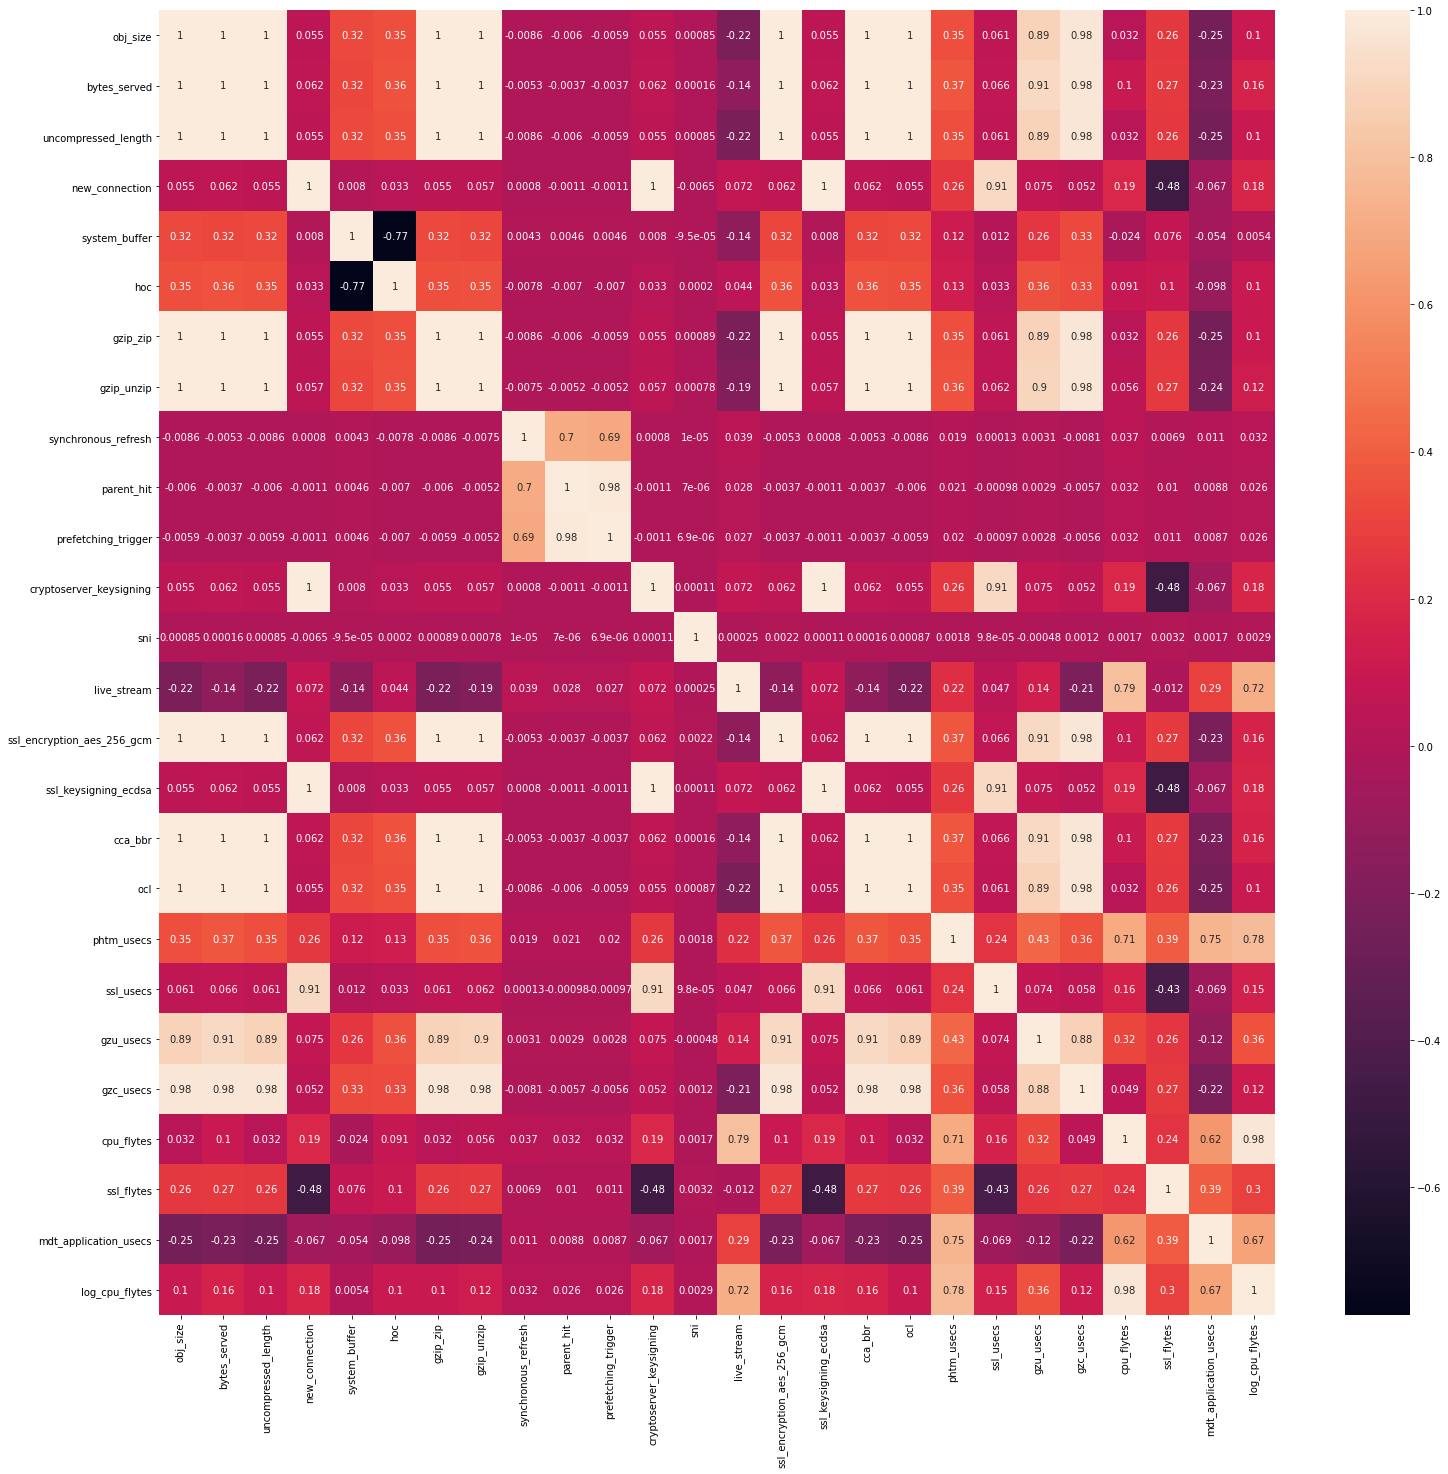

In [84]:
plt.figure(figsize = (25,24))
sns.heatmap(df.drop(["session_ticket","icp_peer_hit"],axis=1).corr(),annot=True)

## Handling multi-collinearity

In [72]:
combine_correlated_features(df,{"obj_size":["bytes_served","uncompressed_length","gzip_zip","gzip_unzip","ssl_encryption_aes_256_gcm","cca_bbr","ocl"]})

New combined variable: obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl
Dropping: ['bytes_served', 'gzip_unzip', 'gzip_zip', 'obj_size', 'ocl', 'uncompressed_length', 'cca_bbr', 'ssl_encryption_aes_256_gcm']


In [73]:
combine_correlated_features(df,{"new_connection":["ssl_keysigning_ecdsa","cryptoserver_keysigning"]})

New combined variable: new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning
Dropping: ['cryptoserver_keysigning', 'new_connection', 'ssl_keysigning_ecdsa']


In [74]:
combine_correlated_features(df,{"obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl":["gzu_usecs","gzc_usecs"]})

New combined variable: obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs
Dropping: ['obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl', 'gzu_usecs', 'gzc_usecs']


In [75]:
df.drop(["cpu_flytes"],axis=1,inplace=True)

In [76]:
combine_correlated_features(df,{"prefetching_trigger":["parent_hit"]})

New combined variable: prefetching_trigger_parent_hit
Dropping: ['prefetching_trigger']


In [77]:
combine_correlated_features(df,{"ssl_usecs":["new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning"]})

New combined variable: ssl_usecs_new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning
Dropping: ['ssl_usecs']


In [78]:
df.drop(["parent_hit"],axis=1,inplace=True)

In [80]:
df.drop(["hoc"],axis=1,inplace=True)
df.rename({"system_buffer":"system_buffer_hoc"},axis=1,inplace=True)

In [81]:
df.drop("new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning",axis=1,inplace=True)

In [82]:
df.columns

Index(['system_buffer_hoc', 'synchronous_refresh', 'icp_peer_hit',
       'session_ticket', 'sni', 'live_stream', 'phtm_usecs', 'ssl_flytes',
       'mdt_application_usecs', 'log_cpu_flytes',
       'obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs',
       'prefetching_trigger_parent_hit',
       'ssl_usecs_new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning'],
      dtype='object')

<AxesSubplot:>

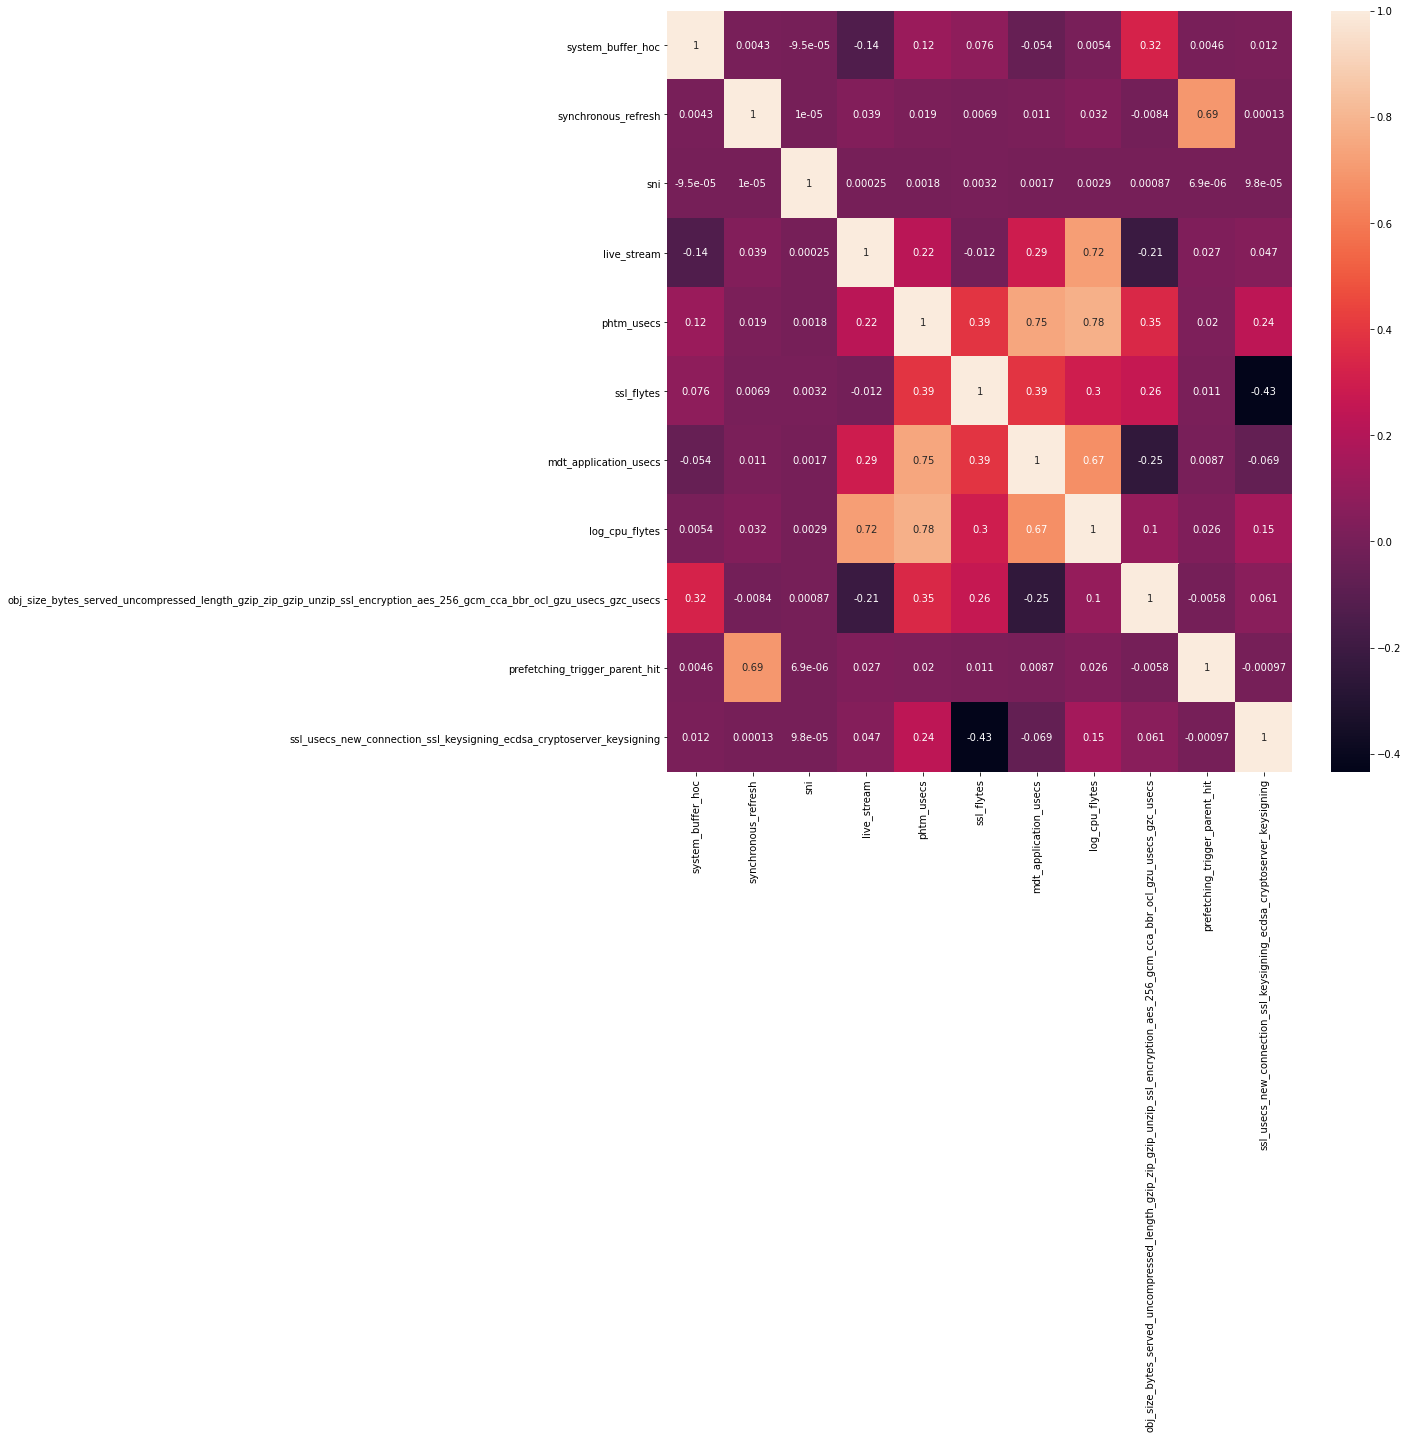

In [85]:
plt.figure(figsize = (14,14))
sns.heatmap(df.drop(["session_ticket","icp_peer_hit"],axis=1).corr(),annot=True)

## All features obtained are having positive direct corelation with log_cpu_flytes.

In [86]:
df.columns

Index(['system_buffer_hoc', 'synchronous_refresh', 'icp_peer_hit',
       'session_ticket', 'sni', 'live_stream', 'phtm_usecs', 'ssl_flytes',
       'mdt_application_usecs', 'log_cpu_flytes',
       'obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs',
       'prefetching_trigger_parent_hit',
       'ssl_usecs_new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning'],
      dtype='object')

In [87]:
df.head()

system_buffer_hoc  synchronous_refresh  icp_peer_hit  session_ticket  sni  \
1                  0                    0             0               0    1   
5                690                    0             0               0    1   
6                  0                    0             0               0    1   
7                  0                    0             0               0    1   
8                  0                    0             0               0    1   

   live_stream  phtm_usecs  ssl_flytes  mdt_application_usecs  log_cpu_flytes  \
1         5833        1909        3703                   1258       11.755817   
5         5833        1468        1559                    922       10.866127   
6         5833        1874        2234                   1247       11.110326   
7         5833        2230        2700                   1463       11.284254   
8         5833        1860        1891                   1248       11.202220   

   obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs  \
1                                        1017.048828                                                                          
5                                        1008.548828                                                                          
6                                        1025.298828                                                                          
7                                        1025.548828                                                                          
8                                        1013.798828                                                                          

   prefetching_trigger_parent_hit  \
1                               0   
5                               0   
6                               0   
7                               0   
8                               0   

   ssl_usecs_new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning  
1                                                  0                      
5                                                  0                      
6                                                  0                      
7                                                  0                      
8                                                  0

## Normalizing the features

In [88]:
df.icp_peer_hit.value_counts(),df.session_ticket.value_counts()

(0    2847743
 Name: icp_peer_hit, dtype: int64,
 0    2847743
 Name: session_ticket, dtype: int64)

## Since, all values of the above features are zero so, the coefficients obtained will be infinite and hence not using these values to make the model

In [89]:
df.drop(["icp_peer_hit","session_ticket"],axis=1,inplace=True)

In [90]:
coeff_multiplier={}
for i in df.columns:
    if i !="log_cpu_flytes":
        coeff_multiplier[i]=max(df[i])-min(df[i])
print(coeff_multiplier)

{'system_buffer_hoc': 1173, 'synchronous_refresh': 1, 'sni': 1, 'live_stream': 5941, 'phtm_usecs': 1483, 'ssl_flytes': 4111, 'mdt_application_usecs': 938, 'obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs': 6001.75390625, 'prefetching_trigger_parent_hit': 1, 'ssl_usecs_new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning': 1813}


In [91]:
# Defining the normalizing function
def normalize_(arr):
    return (arr-min(arr))/(max(arr)-min(arr))

In [92]:
# Normalizing all the columns except response variable 
for i in df.columns:
    if i!= "log_cpu_flytes":
        df["norm_"+i]=normalize_(df[i])
df.head()

system_buffer_hoc  synchronous_refresh  sni  live_stream  phtm_usecs  \
1                  0                    0    1         5833        1909   
5                690                    0    1         5833        1468   
6                  0                    0    1         5833        1874   
7                  0                    0    1         5833        2230   
8                  0                    0    1         5833        1860   

   ssl_flytes  mdt_application_usecs  log_cpu_flytes  \
1        3703                   1258       11.755817   
5        1559                    922       10.866127   
6        2234                   1247       11.110326   
7        2700                   1463       11.284254   
8        1891                   1248       11.202220   

   obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs  \
1                                        1017.048828                                                                          
5                                        1008.548828                                                                          
6                                        1025.298828                                                                          
7                                        1025.548828                                                                          
8                                        1013.798828                                                                          

   prefetching_trigger_parent_hit  ...  norm_system_buffer_hoc  \
1                               0  ...                0.000000   
5                               0  ...                0.588235   
6                               0  ...                0.000000   
7                               0  ...                0.000000   
8                               0  ...                0.000000   

   norm_synchronous_refresh  norm_sni  norm_live_stream  norm_phtm_usecs  \
1                       0.0       1.0          0.981821         0.672286   
5                       0.0       1.0          0.981821         0.374916   
6                       0.0       1.0          0.981821         0.648685   
7                       0.0       1.0          0.981821         0.888739   
8                       0.0       1.0          0.981821         0.639245   

   norm_ssl_flytes  norm_mdt_application_usecs  \
1         0.900754                    0.690832   
5         0.379226                    0.332623   
6         0.543420                    0.679104   
7         0.656775                    0.909382   
8         0.459985                    0.680171   

   norm_obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs  \
1                                           0.153398                                                                               
5                                           0.151982                                                                               
6                                           0.154773                                                                               
7                                           0.154814                                                                               
8                                           0.152857                                                                               

   norm_prefetching_trigger_parent_hit  \
1                                  0.0   
5                                  0.0   
6                                  0.0   
7                                  0.0   
8                                  0.0   

   norm_ssl_usecs_new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning  
1                                                0.0                           
5                                                0.0                           
6          

In [93]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [94]:
df.columns

Index(['system_buffer_hoc', 'synchronous_refresh', 'sni', 'live_stream',
       'phtm_usecs', 'ssl_flytes', 'mdt_application_usecs', 'log_cpu_flytes',
       'obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs',
       'prefetching_trigger_parent_hit',
       'ssl_usecs_new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning',
       'norm_system_buffer_hoc', 'norm_synchronous_refresh', 'norm_sni',
       'norm_live_stream', 'norm_phtm_usecs', 'norm_ssl_flytes',
       'norm_mdt_application_usecs',
       'norm_obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs',
       'norm_prefetching_trigger_parent_hit',
       'norm_ssl_usecs_new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning'],
      dtype='object')

In [95]:
#fit multiple linear regression model
norm_model = ols('log_cpu_flytes ~ norm_system_buffer_hoc + norm_synchronous_refresh + norm_prefetching_trigger_parent_hit + norm_sni + norm_live_stream + norm_phtm_usecs + norm_ssl_flytes + norm_mdt_application_usecs + norm_obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs + norm_ssl_usecs_new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning', data = df).fit()

#view model summary

print(norm_model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_cpu_flytes   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 3.514e+06
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:41:18   Log-Likelihood:             3.7205e+06
No. Observations:             2847743   AIC:                        -7.441e+06
Df Residuals:                 2847732   BIC:                        -7.441e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------

# Null Hypothesis H0: The coefficient is not significant.
# Alternate hypothesis Ha: The coefficient is significant and can be considered for the required purposes.
## P - value : Partial F Test 
## A partial F-test calculates the following F test-statistic:
### F = ((RSSreduced – RSSfull)/p)  /  (RSSfull/n-k)
#### where:
RSSreduced: The residual sum of squares of the reduced (i.e. “nested”) model.
RSSfull: The residual sum of squares of the full model.
p: The number of predictors removed from the full model.
n: The total observations in the dataset.
k: The number of coefficients (including the intercept) in the full model.
### If the p-value corresponding to the F test-statistic is below a certain significance level (e.g. 0.05), then we can reject the null hypothesis and conclude that at least one of the coefficients removed from the full model is significant.


# Performing Hypothesis test on all the coefficients

In [96]:
df.columns

Index(['system_buffer_hoc', 'synchronous_refresh', 'sni', 'live_stream',
       'phtm_usecs', 'ssl_flytes', 'mdt_application_usecs', 'log_cpu_flytes',
       'obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs',
       'prefetching_trigger_parent_hit',
       'ssl_usecs_new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning',
       'norm_system_buffer_hoc', 'norm_synchronous_refresh', 'norm_sni',
       'norm_live_stream', 'norm_phtm_usecs', 'norm_ssl_flytes',
       'norm_mdt_application_usecs',
       'norm_obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs',
       'norm_prefetching_trigger_parent_hit',
       'norm_ssl_usecs_new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning'],
      dtype='object')

In [98]:
df.columns[11]

'norm_system_buffer_hoc'

In [99]:
for i in df.columns[11:]:    
    hypotheses = '('+i+' = 0)'
    f_test = norm_model.f_test(hypotheses)
    print(i,f_test,'\n')

norm_system_buffer_hoc <F test: F=array([[1911.03111955]]), p=0.0, df_denom=2.85e+06, df_num=1> 

norm_synchronous_refresh <F test: F=array([[46.08182192]]), p=1.134379697147311e-11, df_denom=2.85e+06, df_num=1> 

norm_sni <F test: F=array([[74.69140557]]), p=5.506286509110631e-18, df_denom=2.85e+06, df_num=1> 

norm_live_stream <F test: F=array([[10455058.37441376]]), p=0.0, df_denom=2.85e+06, df_num=1> 

norm_phtm_usecs <F test: F=array([[796266.61121851]]), p=0.0, df_denom=2.85e+06, df_num=1> 

norm_ssl_flytes <F test: F=array([[78709.71846594]]), p=0.0, df_denom=2.85e+06, df_num=1> 

norm_mdt_application_usecs <F test: F=array([[8519.36669271]]), p=0.0, df_denom=2.85e+06, df_num=1> 

norm_obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs <F test: F=array([[2650.20102341]]), p=0.0, df_denom=2.85e+06, df_num=1> 

norm_prefetching_trigger_parent_hit <F test: F=array([[41.03656169]]), p=1.494310862598999e-10, df_den

### Since, All the P-values are less then 0.05 hence, on 5 % significance level we have enough evidence to reject the null Hypothesis and most of the model coefficients are significant. 

In [100]:
coeff_multiplier

{'system_buffer_hoc': 1173,
 'synchronous_refresh': 1,
 'sni': 1,
 'live_stream': 5941,
 'phtm_usecs': 1483,
 'ssl_flytes': 4111,
 'mdt_application_usecs': 938,
 'obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs': 6001.75390625,
 'prefetching_trigger_parent_hit': 1,
 'ssl_usecs_new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning': 1813}

## Denormalization  &
# Point Estimate of the coefficients obtained:

In [101]:
for i in coeff_multiplier:
    if i=="log_cpu_flytes" :
        continue
    else:
        print('--> ',i,': Coeff: ',norm_model.params.loc['norm_'+i]/coeff_multiplier[i],'95% confidence interval: [ ',abs(norm_model.conf_int(alpha=0.05).loc["norm_"+i]/coeff_multiplier[i])[0],' , ',abs(norm_model.conf_int(alpha=0.05).loc["norm_"+i]/coeff_multiplier[i])[1],' ]')
        hypotheses = '(norm_'+i+' = 0)'
        f_test = norm_model.f_test(hypotheses)
        print(f_test,'\n')

-->  system_buffer_hoc : Coeff:  3.938445860524984e-06 95% confidence interval: [  3.7618667699177543e-06  ,  4.115024951132213e-06  ]
<F test: F=array([[1911.03111955]]), p=0.0, df_denom=2.85e+06, df_num=1> 

-->  synchronous_refresh : Coeff:  -0.03070651467001351 95% confidence interval: [  0.03957223402935876  ,  0.02184079531066826  ]
<F test: F=array([[46.08182192]]), p=1.134379697147311e-11, df_denom=2.85e+06, df_num=1> 

-->  sni : Coeff:  0.4004035832267581 95% confidence interval: [  0.3095983423402025  ,  0.49120882411331374  ]
<F test: F=array([[74.69140557]]), p=5.506286509110631e-18, df_denom=2.85e+06, df_num=1> 

-->  live_stream : Coeff:  8.6424191067388e-05 95% confidence interval: [  8.637180444867922e-05  ,  8.647657768609677e-05  ]
<F test: F=array([[10455058.37441376]]), p=0.0, df_denom=2.85e+06, df_num=1> 

-->  phtm_usecs : Coeff:  0.0005482949066802686 95% confidence interval: [  0.0005470906107063288  ,  0.0005494992026542084  ]
<F test: F=array([[796266.6112185

# Varifying whether the assumptions are satisfied or not using:
## 1. Residual Plots
## 2. QQ plot or NPP for normality check
## 3. Homoskedaticity test and visual analysis through residual plot

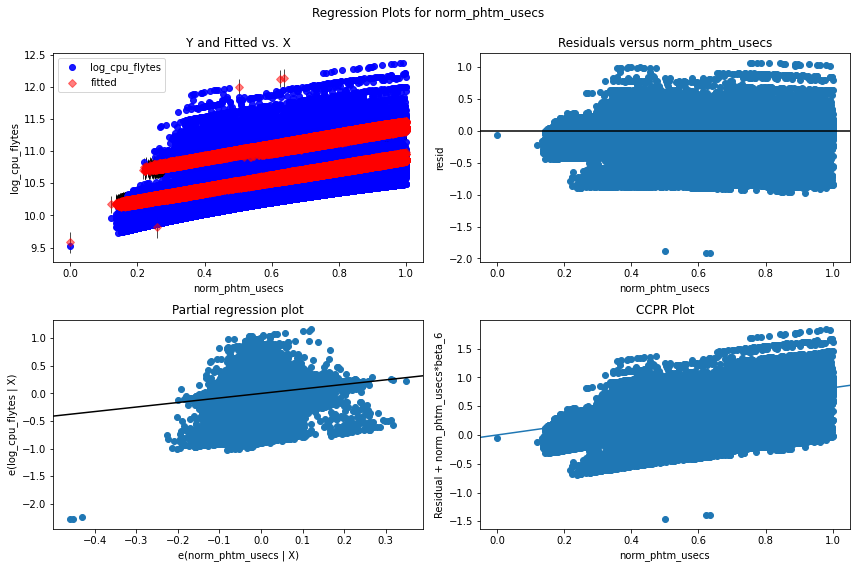

In [401]:
#create residual vs. predictor plot for 'norm_phtm_usecs '
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(norm_model, 'norm_phtm_usecs', fig=fig)

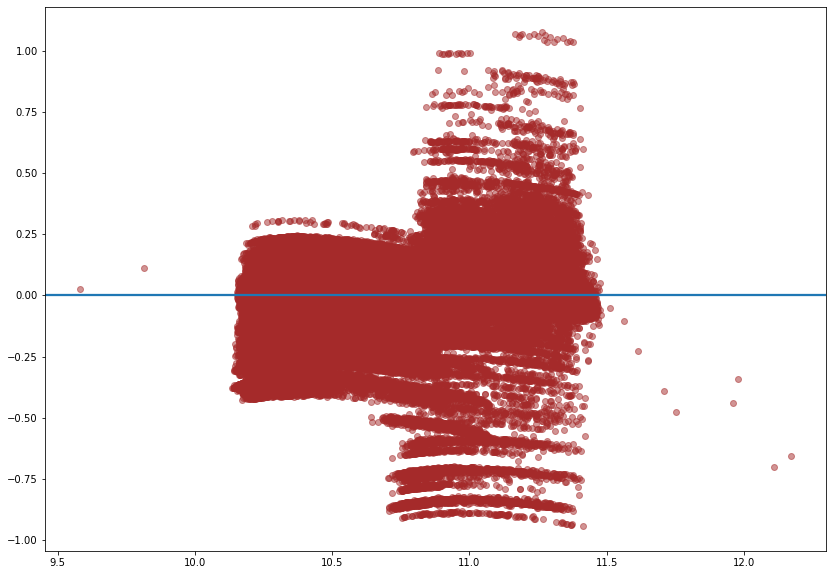

In [103]:
plt.figure(figsize=(14,10))
g3 = sns.residplot(x=norm_model.fittedvalues, y=norm_model.resid, order=2,
   data=norm_model, scatter_kws={'color': 'brown',
   'alpha': 0.5},lowess=True);
plt.show()

### We conclude from the above residual plots that their is no such pattern in the residuals so the condition of linearity is satisfied.
### Also It is observed from the residual plot that the model is homoskedatic as no such deviation in variances of the residual plot is observed.

/Users/grai/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

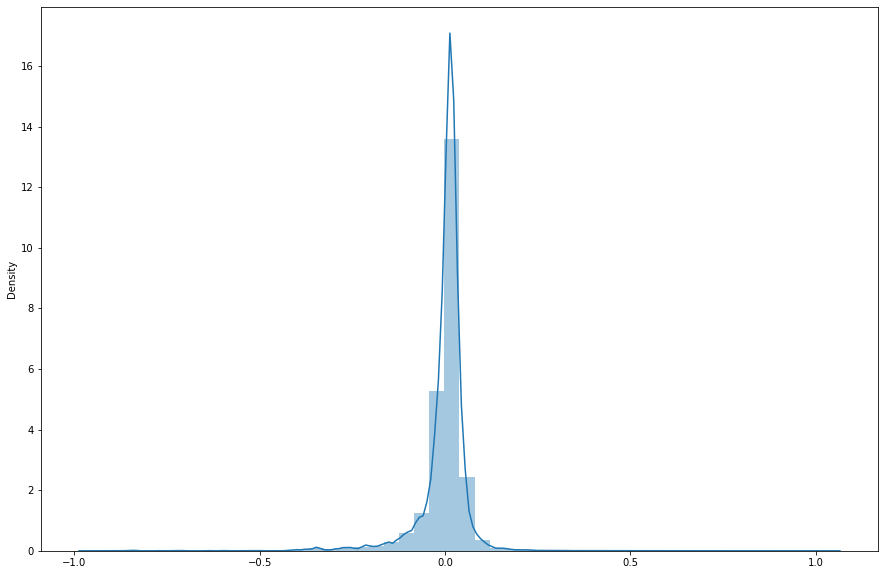

In [104]:
plt.figure(figsize=(15,10))
sns.distplot(norm_model.resid)

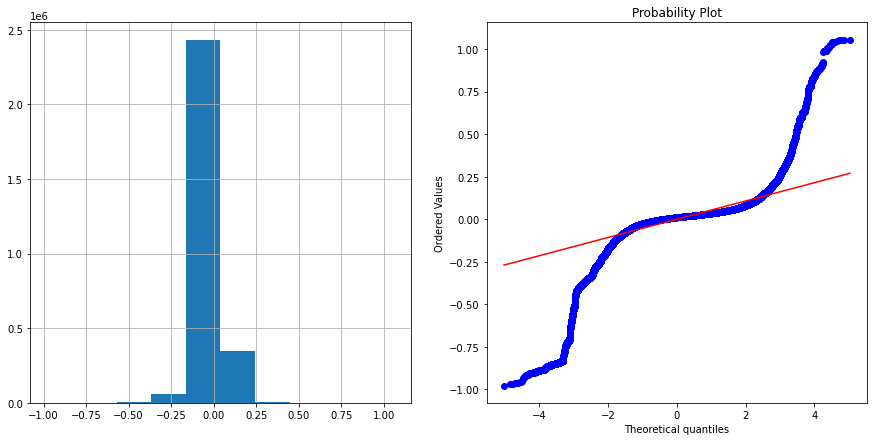

In [105]:
diagnostic_plot(norm_model.resid)

## We can see from the above NPP plot or QQ plot normality assumption is not fully satisfied with initial values however, overall it is ok.

## Making a model without normalization

In [106]:
df.index

Int64Index([      1,       5,       6,       7,       8,      13,      14,
                 16,      17,      18,
            ...
            3269253, 3269257, 3269259, 3269260, 3269263, 3269264, 3269283,
            3269285, 3269316, 3269743],
           dtype='int64', length=2847743)

In [107]:
df.head()

system_buffer_hoc  synchronous_refresh  sni  live_stream  phtm_usecs  \
1                  0                    0    1         5833        1909   
5                690                    0    1         5833        1468   
6                  0                    0    1         5833        1874   
7                  0                    0    1         5833        2230   
8                  0                    0    1         5833        1860   

   ssl_flytes  mdt_application_usecs  log_cpu_flytes  \
1        3703                   1258       11.755817   
5        1559                    922       10.866127   
6        2234                   1247       11.110326   
7        2700                   1463       11.284254   
8        1891                   1248       11.202220   

   obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs  \
1                                        1017.048828                                                                          
5                                        1008.548828                                                                          
6                                        1025.298828                                                                          
7                                        1025.548828                                                                          
8                                        1013.798828                                                                          

   prefetching_trigger_parent_hit  ...  norm_system_buffer_hoc  \
1                               0  ...                0.000000   
5                               0  ...                0.588235   
6                               0  ...                0.000000   
7                               0  ...                0.000000   
8                               0  ...                0.000000   

   norm_synchronous_refresh  norm_sni  norm_live_stream  norm_phtm_usecs  \
1                       0.0       1.0          0.981821         0.672286   
5                       0.0       1.0          0.981821         0.374916   
6                       0.0       1.0          0.981821         0.648685   
7                       0.0       1.0          0.981821         0.888739   
8                       0.0       1.0          0.981821         0.639245   

   norm_ssl_flytes  norm_mdt_application_usecs  \
1         0.900754                    0.690832   
5         0.379226                    0.332623   
6         0.543420                    0.679104   
7         0.656775                    0.909382   
8         0.459985                    0.680171   

   norm_obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs  \
1                                           0.153398                                                                               
5                                           0.151982                                                                               
6                                           0.154773                                                                               
7                                           0.154814                                                                               
8                                           0.152857                                                                               

   norm_prefetching_trigger_parent_hit  \
1                                  0.0   
5                                  0.0   
6                                  0.0   
7                                  0.0   
8                                  0.0   

   norm_ssl_usecs_new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning  
1                                                0.0                           
5                                                0.0                           
6          

In [108]:
df.columns

Index(['system_buffer_hoc', 'synchronous_refresh', 'sni', 'live_stream',
       'phtm_usecs', 'ssl_flytes', 'mdt_application_usecs', 'log_cpu_flytes',
       'obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs',
       'prefetching_trigger_parent_hit',
       'ssl_usecs_new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning',
       'norm_system_buffer_hoc', 'norm_synchronous_refresh', 'norm_sni',
       'norm_live_stream', 'norm_phtm_usecs', 'norm_ssl_flytes',
       'norm_mdt_application_usecs',
       'norm_obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs',
       'norm_prefetching_trigger_parent_hit',
       'norm_ssl_usecs_new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning'],
      dtype='object')

In [143]:
#fit multiple linear regression model
model = ols('log_cpu_flytes ~ system_buffer_hoc + synchronous_refresh + sni + live_stream + phtm_usecs + ssl_flytes + mdt_application_usecs + obj_size_bytes_served_uncompressed_length_gzip_zip_gzip_unzip_ssl_encryption_aes_256_gcm_cca_bbr_ocl_gzu_usecs_gzc_usecs + prefetching_trigger_parent_hit + ssl_usecs_new_connection_ssl_keysigning_ecdsa_cryptoserver_keysigning', data = df).fit()

#view model summary

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_cpu_flytes   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 3.514e+06
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:06:47   Log-Likelihood:             3.7205e+06
No. Observations:             2847743   AIC:                        -7.441e+06
Df Residuals:                 2847732   BIC:                        -7.441e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------

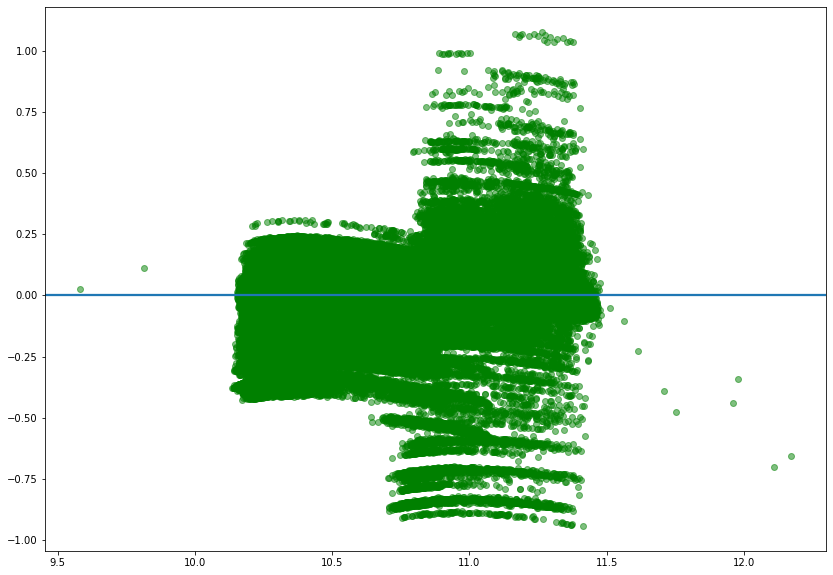

In [144]:
plt.figure(figsize=(14,10))
g3 = sns.residplot(x=model.fittedvalues, y=model.resid, order=2,
   data=norm_model, scatter_kws={'color': 'g',
   'alpha': 0.5},lowess=True);
plt.show()

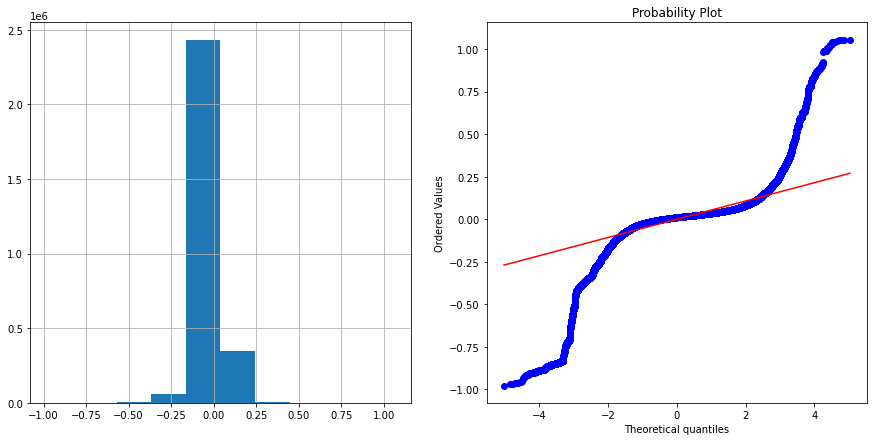

In [145]:
diagnostic_plot(model.resid)

In [146]:
for i in df.columns[:10]:
    if i=="log_cpu_flytes":
        continue
    else:
        print('--> ',i,'\"','"''95% Confidence Interval: [ ',abs(model.conf_int(alpha=0.05).loc[i])[0],' , ',abs(model.conf_int(alpha=0.05).loc[i])[1],' ]')
        hypotheses = '('+i+' = 0)'
        f_test = model.f_test(hypotheses)
        print(f_test,'\n')

-->  system_buffer_hoc " "95% Confidence Interval: [  3.7618667697511814e-06  ,  4.115024950965646e-06  ]
<F test: F=array([[1911.03111939]]), p=0.0, df_denom=2.85e+06, df_num=1> 

-->  synchronous_refresh " "95% Confidence Interval: [  0.03957223402571839  ,  0.021840795306997604  ]
<F test: F=array([[46.08182191]]), p=1.1343797036715454e-11, df_denom=2.85e+06, df_num=1> 

-->  sni " "95% Confidence Interval: [  0.3095983423395047  ,  0.49120882411263067  ]
<F test: F=array([[74.69140557]]), p=5.506286509110631e-18, df_denom=2.85e+06, df_num=1> 

-->  live_stream " "95% Confidence Interval: [  8.637180444929573e-05  ,  8.647657768671336e-05  ]
<F test: F=array([[10455058.37455057]]), p=0.0, df_denom=2.85e+06, df_num=1> 

-->  phtm_usecs " "95% Confidence Interval: [  0.0005470906107062267  ,  0.0005494992026541064  ]
<F test: F=array([[796266.61121816]]), p=0.0, df_denom=2.85e+06, df_num=1> 

-->  ssl_flytes " "95% Confidence Interval: [  2.3310701587864213e-05  ,  2.363869423199438e-